In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **PROBLEM STATEMENT**

**DOMAIN**: Industrial safety. NLP based Chatbot.

**CONTEXT:**
The  database  comes  from one  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION:**
This  The  database  is  basically  records  of  accidents  from12  different  plants  in  03  different  countrieswhich  every  line  in  the  data  is  an occurrence of an accident.

**Columns description:**
- `Data`: timestamp or time/date information
- `Countries`: which country the accident occurred (anonymised)
- `Local`: the city where the manufacturing plant is located (anonymised)
- `Industry sector`: which sector the plant belongs to
- `Accident level`: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- `Potential Accident Level`: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
- `Genre`: if the person is male of female
- `Employee or Third Party`: if the injured person is an employee or a third party
- `Critical Risk`: some description of the risk involved in the accident
- `Description`: Detailed description of how the accident happened.

**PROJECT OBJECTIVE:**
Design  a  ML/DL  based  chatbot  utility  which  can  help  the  professionals  to  highlight  the  safety  risk  as  per  the  incident description.

In [12]:
pip install  pyspellchecker

In [13]:
import pandas as pd
pd.set_option('max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# Deep Learning library
import torch
nltk.download('stopwords')    # loading the stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
# to remove common stop words
from nltk.corpus import stopwords
from spellchecker import SpellChecker
# to visualize text data using wordcloud
# from wordcloud import STOPWORDS

# to perform stemming
from nltk.stem.porter import PorterStemmer
#to perform lemmentization
from nltk.stem import WordNetLemmatizer

# to perform tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library
# To create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To import Word2Vec
from gensim.models import Word2Vec

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

sns.set_style("whitegrid")

from nltk.corpus import wordnet

import random

# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### **Import the dataset and overview**

In [15]:
# Read the xlsx dataset and create a copy of it
#dataset = pd.read_excel('DataSet_industrial_safety_and_health_database_with_accidents_description.xlsx')
dataset = pd.read_excel('/content/drive/MyDrive/Data/DataSet_industrial_safety_and_health_database_with_accidents_description.xlsx')
#dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone/NLPChatbot/DataSet_industrial_safety_and_health_database_with_accidents_description.xlsx')
df = dataset.copy()

In [16]:
# Display the first 3 rows of the dataset
df.head(3)

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.  
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.  
2                                                                                                                                                 In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.

In [17]:
# Display the last 3 rows of the dataset
df.tail(3)

Unnamed: 0       Data   Countries     Local Industry Sector  \
422         436 2017-07-05  Country_02  Local_09          Metals   
423         437 2017-07-06  Country_02  Local_05          Metals   
424         438 2017-07-09  Country_01  Local_04          Mining   

    Accident Level Potential Accident Level   Genre Employee or Third Party  \
422              I                       II    Male                Employee   
423              I                       II    Male                Employee   
424              I                       II  Female             Third Party   

                    Critical Risk  \
422              Venomous Animals   
423                           Cut   
424  Fall prevention (same level)   

                                                                                                                                                                                                                                                     Description  
422  During the environmental monitoring activity in the area, the employee was surprised by a swarming swarm of weevils. During the exit of the place, endured suffering two stings, being one in the face and the other in the middle finger of the left hand.  
423                                                                  The Employee performed the activity of stripping cathodes, when pulling the cathode sheet his hand hit the side of another cathode, causing a blunt cut on his 2nd finger of the left hand.  
424                                             At 10:00 a.m., when the assistant cleaned the floor of module "E" in the central camp, she slipped back and immediately grabbed the laundry table to avoid falling to the floor; suffering the described injury.

In [18]:
# Print the shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 425 rows and 11 columns


### **Data cleaning and analysis**

**Observations from visual analysis of the excel dataset:**
- Column `Unnamed: 0` looks like the row index, and seem to serve no purpose. We shall drop this column.
- Column `Data` is actually the `Date` column and should be renamed so.
- Column `Genre` should be renamed as `Gender` for better understanding. It only has values - `Male` and `Female`.
- Column `Employee or Third Party` can be renamed as `Employee_Type` for better understanding.
- Column `Countries` represent a single country, and should be renamed as `Country` for better representation.
- Column `Local` represents the location, and should be renamed same for better representation.
- We also replace spaces from the column names with `_` for simplicity in programming.

In [19]:
# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Rename the columns
df.rename(columns={
    'Data':'Date',
    'Countries':'Country',
    'Local':'Location',
    'Industry Sector':'Industry_Sector',
    'Accident Level':'Accident_Level',
    'Potential Accident Level':'Potential_Accident_Level',
    'Genre':'Gender',
    'Employee or Third Party':'Employee_Type',
    'Critical Risk':'Critical_Risk'
}, inplace=True)

In [20]:
# Observe couple of rows to see the changes
df.head(2)

Date     Country  Location Industry_Sector Accident_Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   

  Potential_Accident_Level Gender Employee_Type        Critical_Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.  
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.

#### Check for missing or null values or duplicate records

In [21]:
# Check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Location                  425 non-null    object        
 3   Industry_Sector           425 non-null    object        
 4   Accident_Level            425 non-null    object        
 5   Potential_Accident_Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee_Type             425 non-null    object        
 8   Critical_Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [22]:
# Check for missing values
df.isnull().sum()

Date                        0
Country                     0
Location                    0
Industry_Sector             0
Accident_Level              0
Potential_Accident_Level    0
Gender                      0
Employee_Type               0
Critical_Risk               0
Description                 0
dtype: int64

**Observation:** None of the columns have null values.

In [23]:
# Check for duplicate values
df.duplicated().sum()

7

**Observation:** There are 7 duplicate records.

In [24]:
# Drop the duplicate values
df.drop_duplicates(inplace=True)
df=df.reset_index(drop=True)
df.shape

(418, 10)

In [25]:
# Check for duplicate values
df.duplicated().sum()

0

In [26]:
#checking to see  if there are repeated description in our data

df['Description'].duplicated().sum()

7

**Observations** : There are 7 rows that have duplicate descriptions

In [27]:
df[df['Description'].duplicated(keep=False)]

Date     Country  Location Industry_Sector Accident_Level  \
37  2016-02-24  Country_02  Local_07          Mining              I   
38  2016-02-24  Country_02  Local_07          Mining              I   
129 2016-05-26  Country_03  Local_10          Others              I   
130 2016-05-26  Country_03  Local_10          Others              I   
142 2016-06-08  Country_03  Local_10          Others              I   
143 2016-06-08  Country_03  Local_10          Others              I   
165 2016-07-07  Country_01  Local_03          Mining             IV   
166 2016-07-07  Country_01  Local_03          Mining              I   
260 2016-12-01  Country_01  Local_03          Mining              I   
261 2016-12-01  Country_01  Local_03          Mining              I   
381 2017-05-06  Country_02  Local_07          Mining             IV   
382 2017-05-06  Country_02  Local_07          Mining             II   
405 2017-06-20  Country_01  Local_01          Mining              I   
406 2017-06-20  Country_01  Local_01          Mining              I   

    Potential_Accident_Level  Gender Employee_Type Critical_Risk  \
37                         V    Male      Employee        Others   
38                         V  Female   Third Party        Others   
129                        I    Male   Third Party          Bees   
130                        I    Male      Employee        Others   
142                        I    Male   Third Party          Bees   
143                        I    Male   Third Party        Others   
165                        V    Male   Third Party        Others   
166                       IV    Male   Third Party        Others   
260                       IV    Male      Employee        Others   
261                       IV    Male   Third Party        Others   
381                        V    Male      Employee    Projection   
382                        V    Male      Employee    Projection   
405                       IV    Male      Employee        Others   
406                       IV    Male   Third Party        Others   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Description  
37                                                                                                                                                                                                                                                                                                                                                                                                           When starting the activity of removing a coil of electric cables in the warehouse with the help of forklift truck the operator did not notice that there was a beehive in it. Due to the movement of the coil the bees were excited. Realizing the fact the operator turned off the equipment and left the area. People passing by were stung.  
38                                                                                                                                                                                                                                                                                                                                                                                                           When starting the activity of removing a coil of electric 

* 7 accident descriptions are repeated in the data.
* These are accidents which happened at the same time where a group was invovled and there are different records for each person.  
* As this corresponds to different records, we will not remove the repeated descriptions and keep them as it is.

**We now have 418 records after 7 duplicate rows have been removed**

#### Date processing
Let us break the Date in Year, Month and Day which would help in further processing.

In [28]:
df_proc_1 = df.copy()

df_proc_1['Date'] = pd.to_datetime(df_proc_1['Date'])
df_proc_1['Year'] = df_proc_1['Date'].dt.year
df_proc_1['Month'] = df_proc_1['Date'].dt.month_name()
df_proc_1['Day'] = df_proc_1['Date'].dt.day
df_proc_1['Weekday'] = df_proc_1['Date'].dt.day_name()
df_proc_1.drop(columns=['Date'], inplace=True)

df_proc_1.head(3)

Country  Location Industry_Sector Accident_Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   
2  Country_01  Local_03          Mining              I   

  Potential_Accident_Level Gender         Employee_Type        Critical_Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   
2                                                                                                                                                 In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.   

   Year    Month  Day    Weekday  
0  2016  January    1     Friday  
1  2016  January    2   Saturday  
2  2016  January    6  Wednesday

In [29]:
# Select all columns except 'Description'
df_temp = df_proc_1.loc[:, df_proc_1.columns != 'Description']

# Function to display unique values in each column except 'Date' and 'Description'
def unique_values(df_temp):
    for column in df_temp.columns:
        print(f'{column}: {df_temp[column].unique()}')
        print('-----------------------------------')

unique_values(df_temp)

Country: ['Country_01' 'Country_02' 'Country_03']
-----------------------------------
Location: ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
-----------------------------------
Industry_Sector: ['Mining' 'Metals' 'Others']
-----------------------------------
Accident_Level: ['I' 'IV' 'III' 'II' 'V']
-----------------------------------
Potential_Accident_Level: ['IV' 'III' 'I' 'II' 'V' 'VI']
-----------------------------------
Gender: ['Male' 'Female']
-----------------------------------
Employee_Type: ['Third Party' 'Employee' 'Third Party (Remote)']
-----------------------------------
Critical_Risk: ['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fa

Looking at the above output, we may drop the Year and Day columns as they seem irrelevant for the analysis.

In [30]:
# Drop the Day and Year columns
df_proc_1.drop(columns=['Year', 'Day'], inplace=True)
df_proc_1.head(3)

Country  Location Industry_Sector Accident_Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   
2  Country_01  Local_03          Mining              I   

  Potential_Accident_Level Gender         Employee_Type        Critical_Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   
2                                                                                                                                                 In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.   

     Month    Weekday  
0  January     Friday  
1  January   Saturday  
2  January  Wednesday

## **Exploratory Data Analysis**

### **Univariate analysis**

#### **Distribution of individual columns**

In [31]:
df_proc_1.columns

Index(['Country', 'Location', 'Industry_Sector', 'Accident_Level',
       'Potential_Accident_Level', 'Gender', 'Employee_Type', 'Critical_Risk',
       'Description', 'Month', 'Weekday'],
      dtype='object')

In [32]:
# Function to plot distribution of each column
def plot_countplot(df_temp, column):
    plt.figure(figsize=(20, 6))
    sns.countplot(data=df_temp, x=column, order=df_temp[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')

    # Annotate the frequency percentage of each label
    total = len(df_temp[column])
    for p in plt.gca().patches:
        height = p.get_height()
        percentage = f'{height / total:.2%}'
        plt.gca().annotate(f'{percentage}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

##### Country

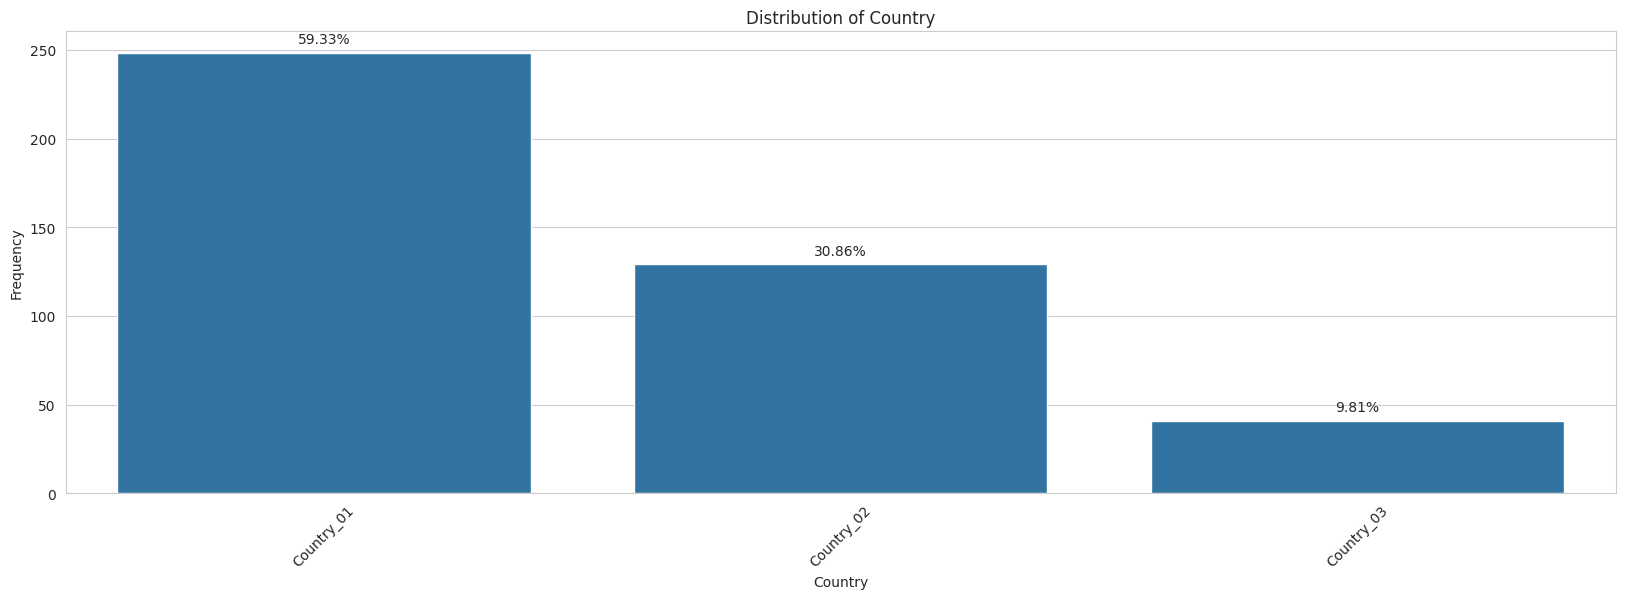

In [33]:
plot_countplot(df_proc_1, 'Country')

We have data for 3 countries, 60% of the data is for Country_01, 31% for countrty_02 and only 10% for country_03. It is possible country_01 is more prone to accidents, or there is data imbalace. Need to check if there is some relationships between country and accidents

##### Location

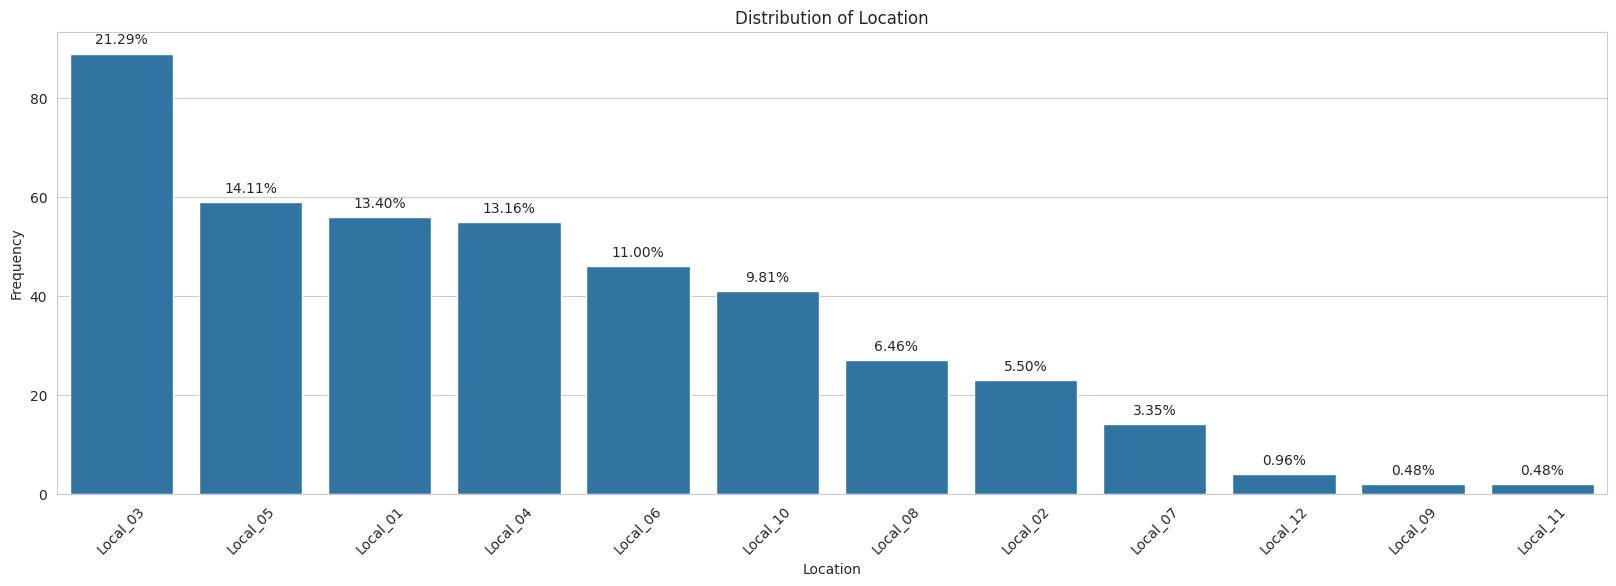

In [34]:
plot_countplot(df_proc_1, 'Location')

##### Industry Sector

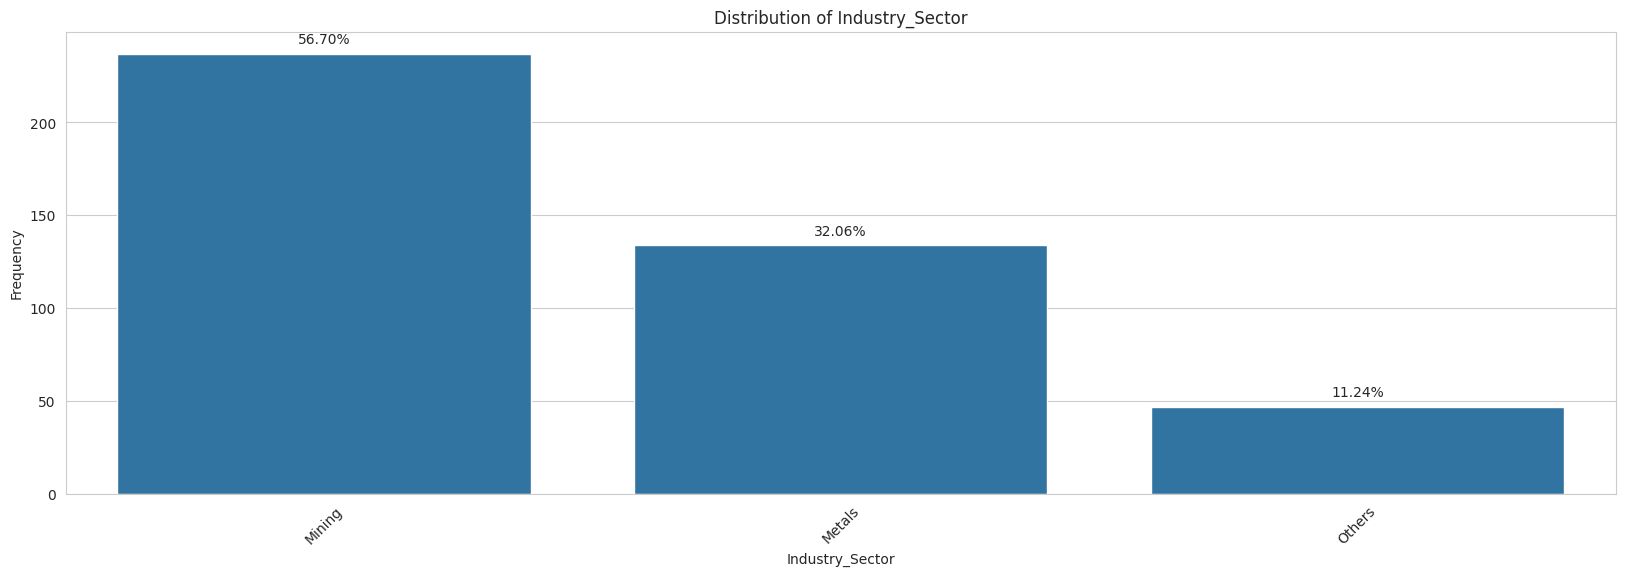

In [35]:
plot_countplot(df_proc_1, 'Industry_Sector')

##### Accident Level

Because of the nature of work Mining sector is more prone to accidents then Metals and others which is also being reflected in the data.

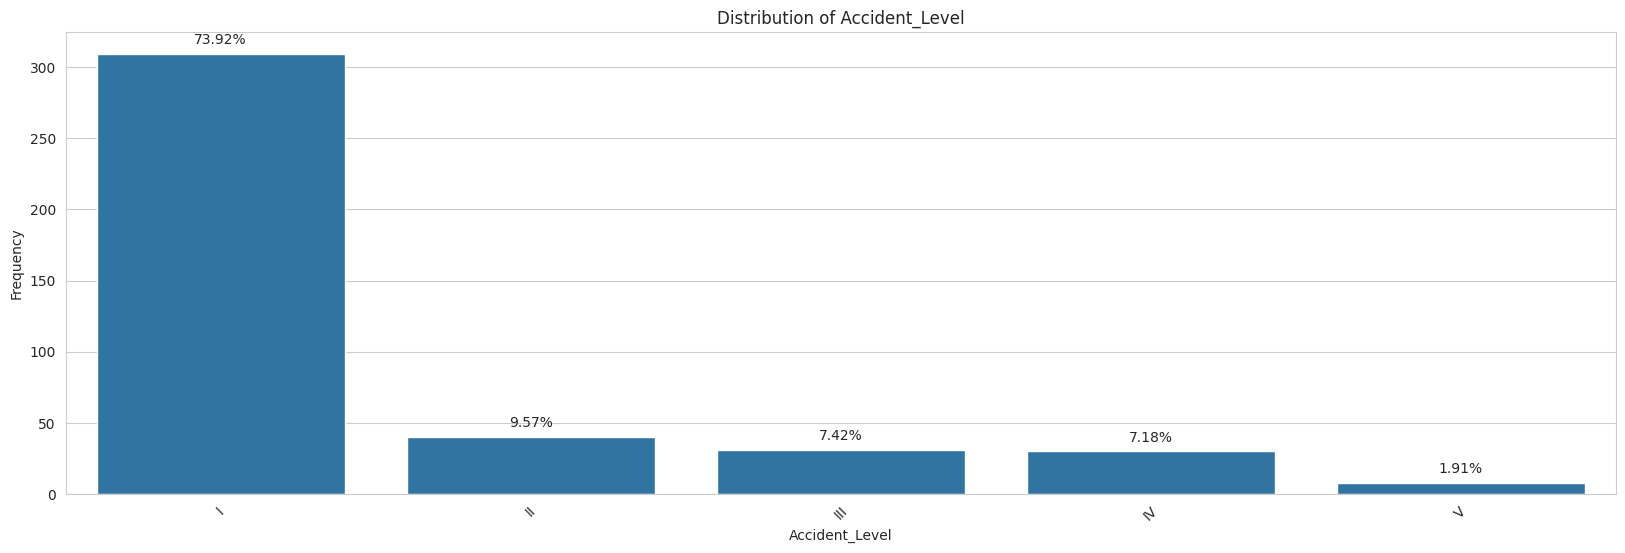

In [36]:
plot_countplot(df_proc_1, 'Accident_Level')

there are around 2% of accidents in severe category 5. Though there is no data for accidents in level 6 which is the highest category.

##### Potential Accident Level

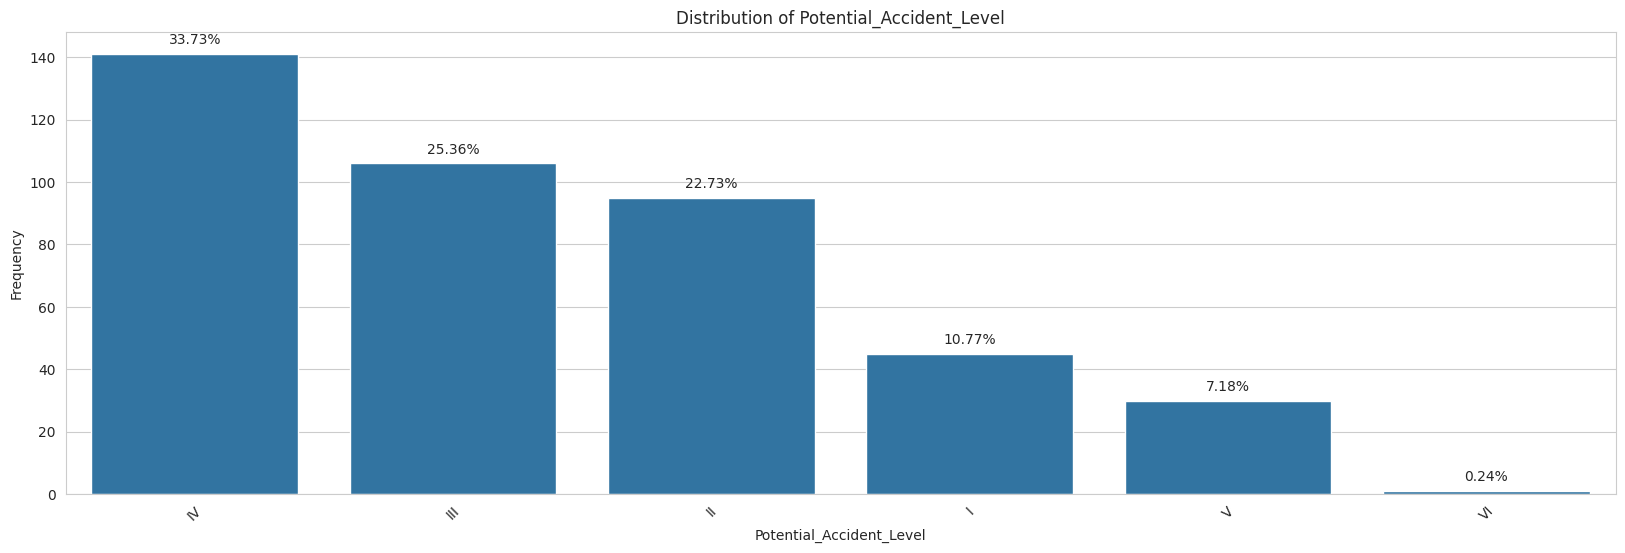

In [37]:
plot_countplot(df_proc_1, 'Potential_Accident_Level')

There are 34% scenarios where the accidents could be as severe as range 4, followed by 25.3% of level 3. Also 0.24% chances of the most severe level 6.

##### Gender

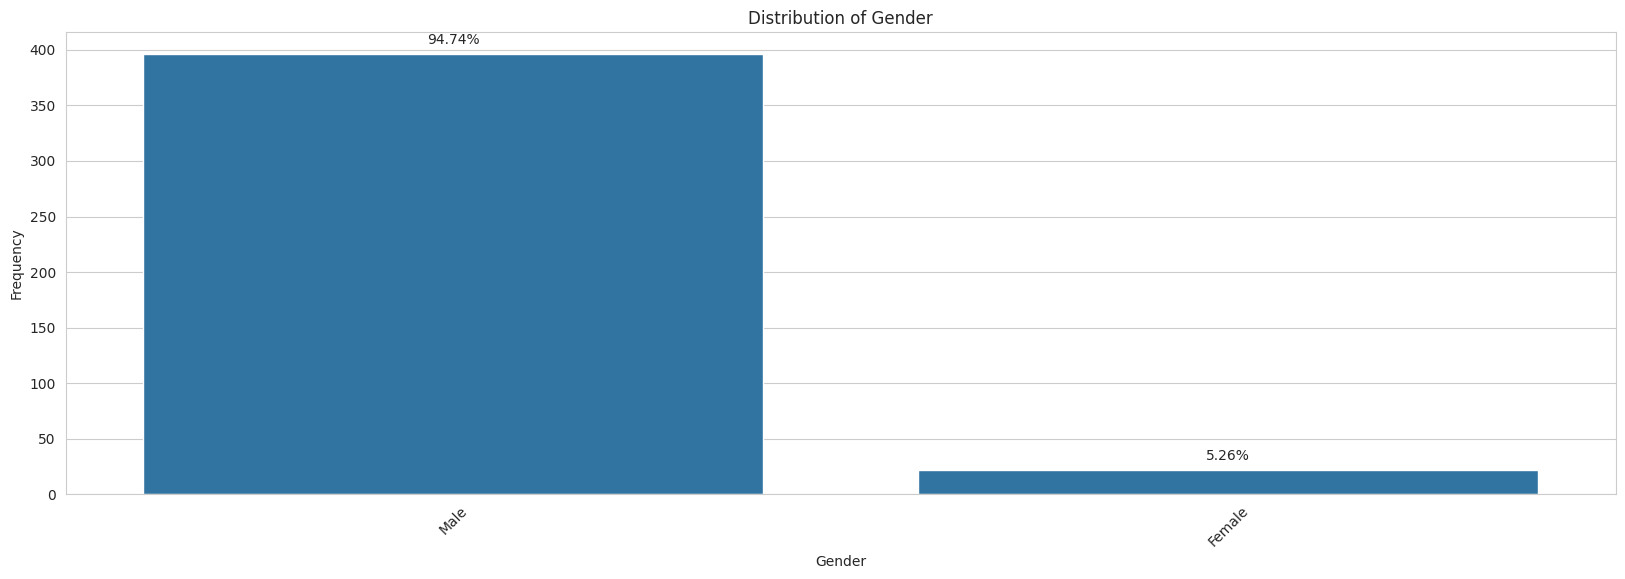

In [38]:
plot_countplot(df_proc_1, 'Gender')

##### Employee Type

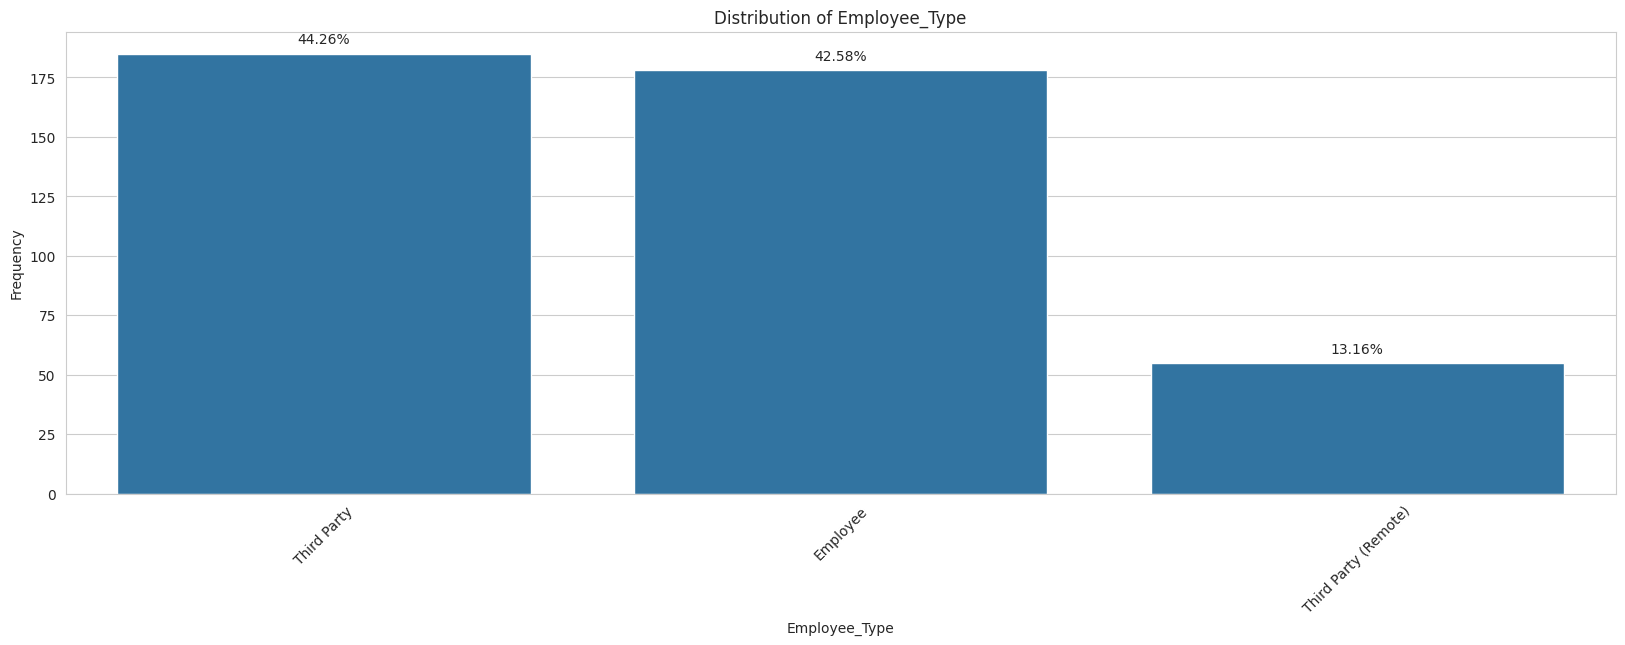

In [39]:
plot_countplot(df_proc_1, 'Employee_Type')

##### Critical Risk

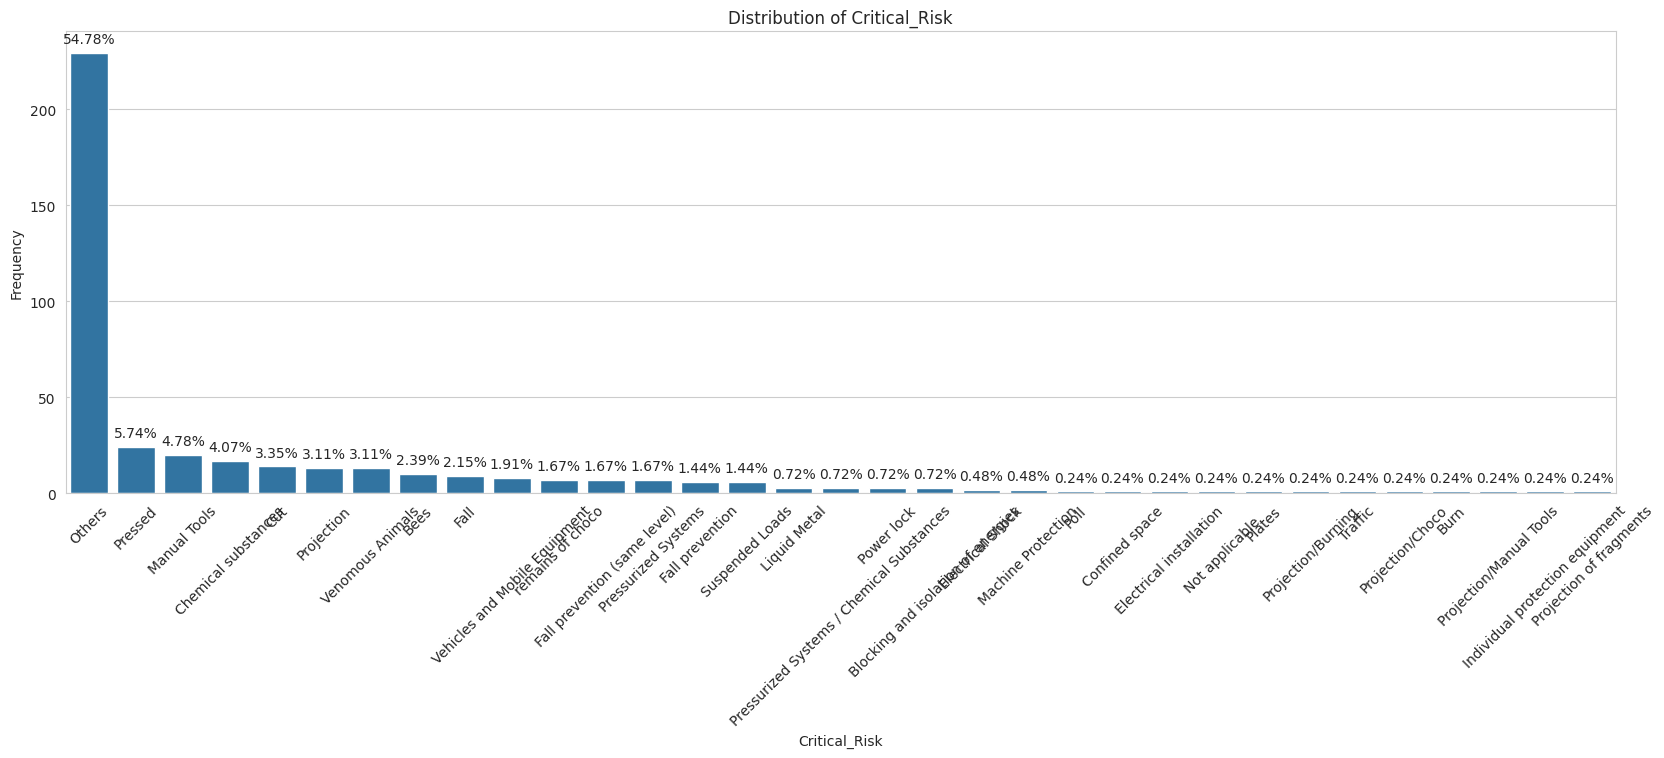

In [40]:
plot_countplot(df_proc_1, 'Critical_Risk')

##### Month

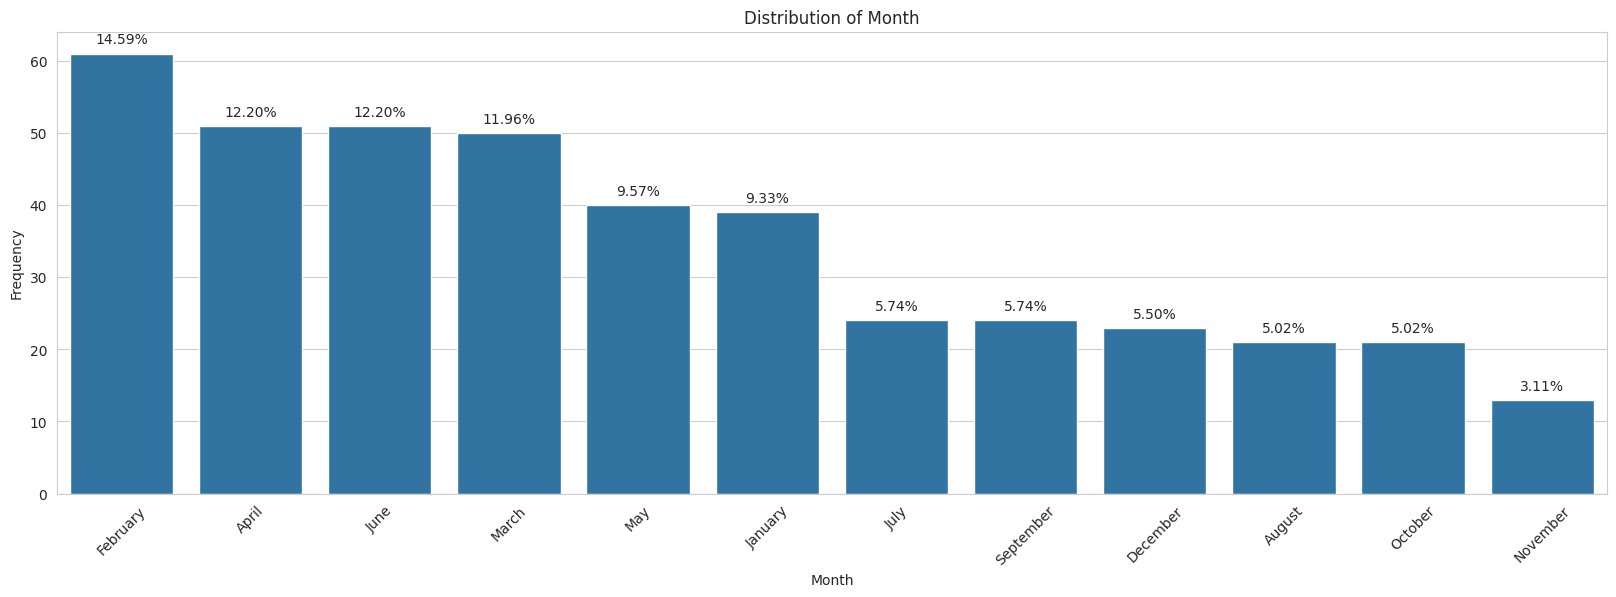

In [41]:
plot_countplot(df_proc_1, 'Month')

##### Weekday

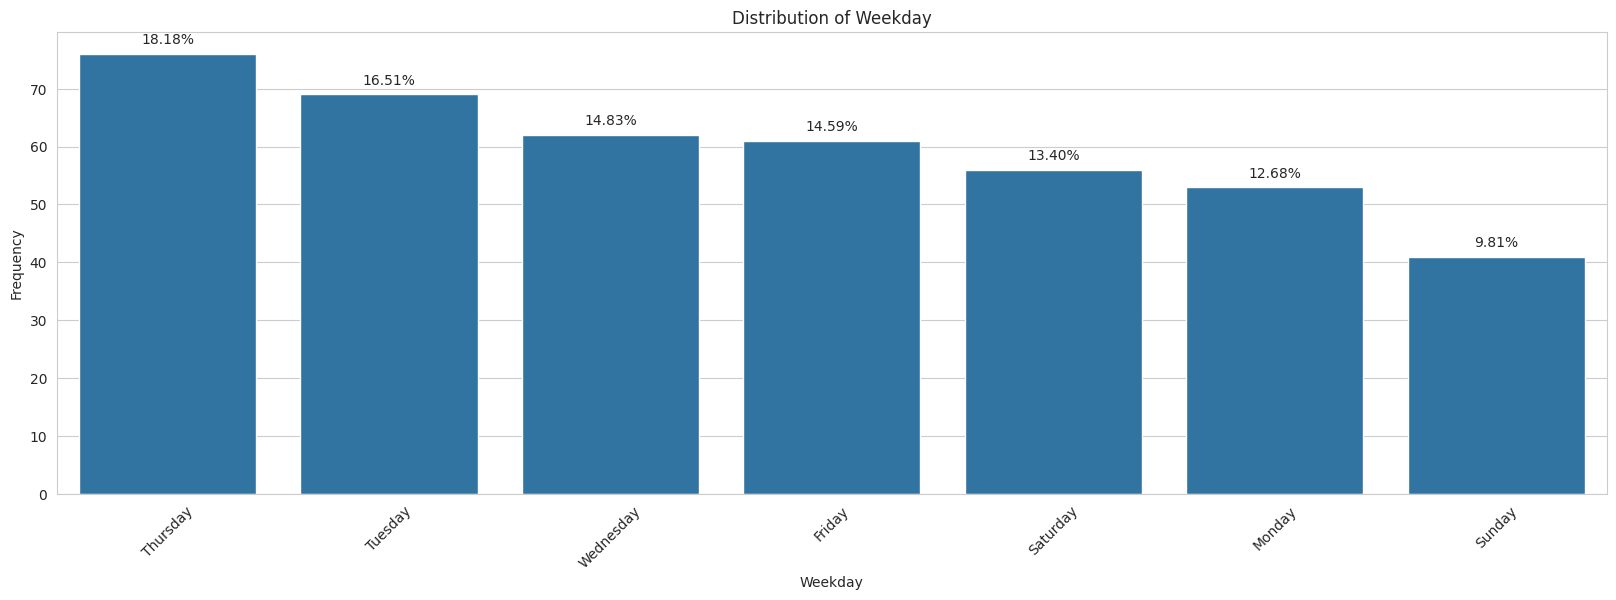

In [42]:
plot_countplot(df_proc_1, 'Weekday')

### Observations from the above univariate vizualization are:

**Country**
- Data is available for only 3 countries. Country_01 is most pront to accidents followed by country 2

**Industry Sector**
- Mining sector has the most accident cases than any other sector. Thus, we can say that jobs in the mining industry sector are more risky than metal or any other sector.

**Gender**
- Dataset is more biased towards male employees, this is possible because Mining and Metal industries are more male dominant.  

**Employee type**
- Total number of internal employees and Third Party employees is more or less the same. But, we can also see that Third party remote employees are comparatively less in number.

**Local**
- There is data for 12 locations across 3 countries. Local_03 has seen the maximum number of accidents, which is around 20% of all the accident cases recorded.

**Critical Risk**
- Most of the Critical Risks are classified as 'Others'. It holds around 55% of the total Critical Risks. It is followed by Pressed, Manual tools, Chemical substances, etc.

**Accident Level**
- Accident levels are mostly of Level 1 with 74% of the data, followed by 9/.5% of level 2 and ~7% for levels 3 and 4 and ~2% for level 5. There have been no accidents of level 6 which is the highest level.

**Potential Accident Level**
- Potential accident level indicates how severe the accident would have been due to other factors involved in the accidents. As per the graph, level IV has the highest count, which corresponds to moderate severity of accidents.


### **Bivariate Analysis**

In [43]:
targetColumn ="Potential_Accident_Level"
targetColumnName="Potential Accident Level"

#### **Distribution of features by Potential Accident Level**

In [44]:
# Function to plot the distribution of accident levels by input column
def plot_accident_levels(df_temp, column,targetColumn,targetColumnName, figsize=(20, 6), title_fontsize=10, label_fontsize=10, ticks_fontsize=10):
    plt.figure(figsize=figsize)
    # Specify the desired order for the legend
    hue_order = ['I', 'II','III','IV','V','VI']
    sns.countplot(data=df_temp, x=column, hue=targetColumn,hue_order=hue_order,order=df_temp[column].value_counts().index, palette='Set2', dodge=True)
    #sns.countplot(data=df_temp, x=column, hue=targetColumn, dodge=False)
    plt.title(f'Distribution of {targetColumnName} Levels by {column}', fontsize=title_fontsize)
    plt.xlabel(column, fontsize=label_fontsize)
    plt.xticks(rotation=90, fontsize=ticks_fontsize)
    plt.ylabel('Frequency', fontsize=label_fontsize)
    plt.legend(title=targetColumnName, fontsize=ticks_fontsize, title_fontsize=label_fontsize
               ,handlelength=3,      # Length of legend handles
              handleheight=2,      # Height of legend handles
              labelspacing=1.5,    # Space between legend labels
                borderpad=  2          # Padding inside the legend box
               )
    plt.show()

In [45]:
# Defining a function to further create Pie Charts

def plot_each_pieChart(df_temp,columnName,columnValue,targetColumn ,targetColumnName):
  # Get colors from a Seaborn palette
  colors = sns.color_palette('deep',df_temp[targetColumn].nunique())

  plt.pie(df_temp[df_temp[columnName]==columnValue][targetColumn].value_counts()
          ,labels=df_temp[df_temp[columnName]==columnValue][targetColumn].value_counts().index
          , colors=colors
          ,autopct='%1.1f%%');

def plot_pieChartshowAllPiesForColumn(df_temp, columnName,targetColumn,targetColumnName, columnsPerRow):
  noOfUniques=len(df_temp[columnName].unique())
  noOfColumns=columnsPerRow
  noOfRows=int(np.ceil(noOfUniques/noOfColumns))
  #fig, axes = plt.subplots(noOfRows,noOfColumns, figsize=(noOfColumns*5,noOfRows*5))
  #fig.tight_layout()
  plt.figure(figsize=(noOfColumns*4,noOfRows*4));
  for i, column in enumerate(df_temp[columnName].unique()):
    plt.subplot(noOfRows,noOfColumns,i+1)
    plot_each_pieChart(df_temp,columnName,column,targetColumn,targetColumnName)
    plt.title(f'{targetColumnName} vs '+column, fontsize=10)
  plt.show()

##### Accidents by Country

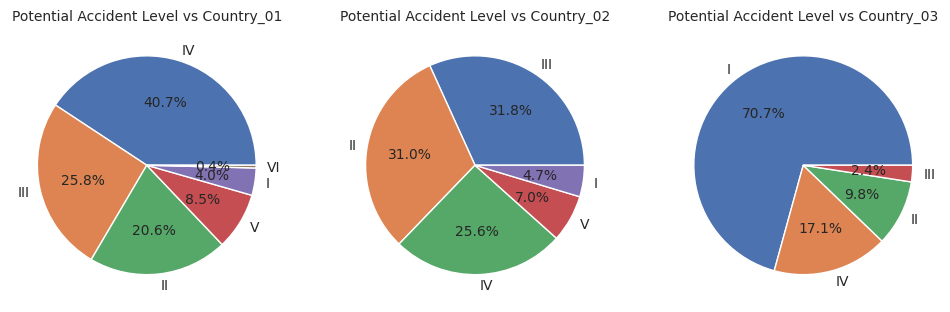

In [46]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Country', targetColumn,targetColumnName,3)

* % of potential accidents level 1 and 2 are more than the severe ones.
* Severity of accidents are highest in count_01. Only country 1 has potential accident level of 6. It would be interesting to investigate further to know the reason for this. Why the most severe accidents are specific to country_01?

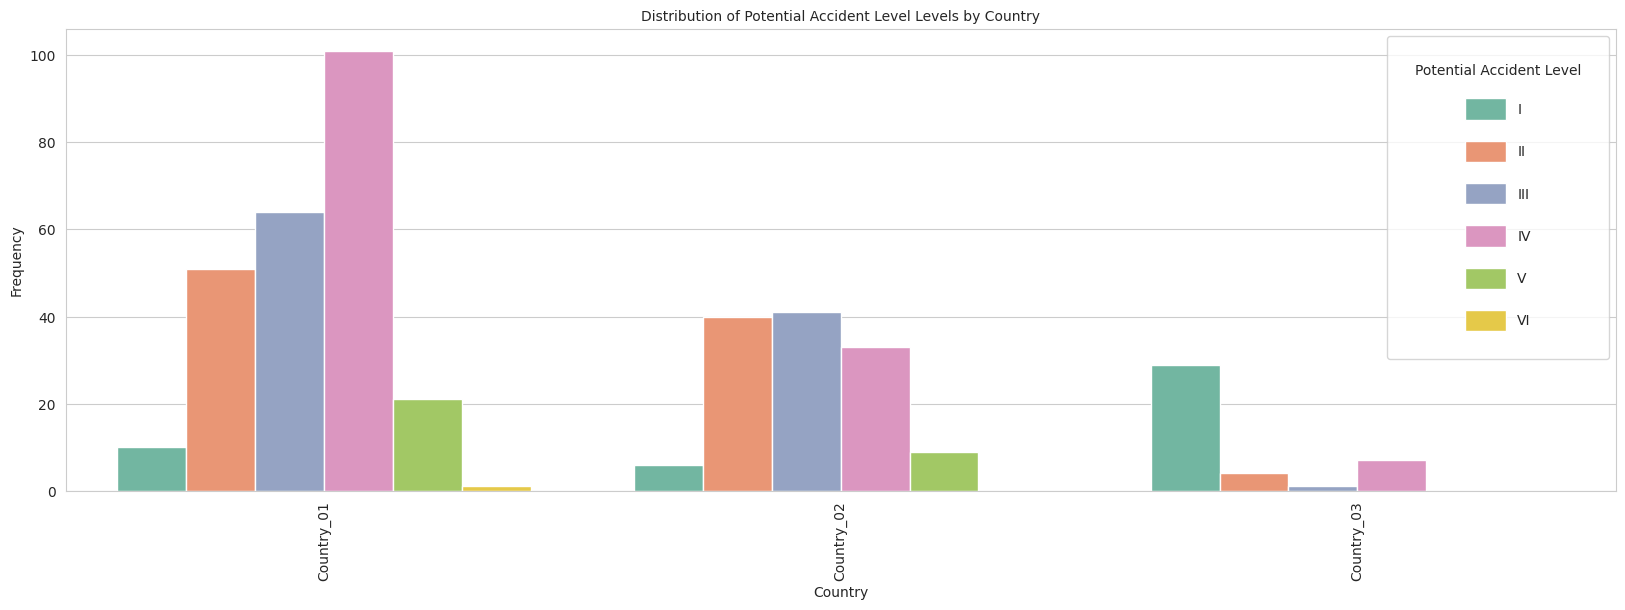

In [47]:
plot_accident_levels(df_proc_1, 'Country',targetColumn,targetColumnName )

##### Accidents by Location

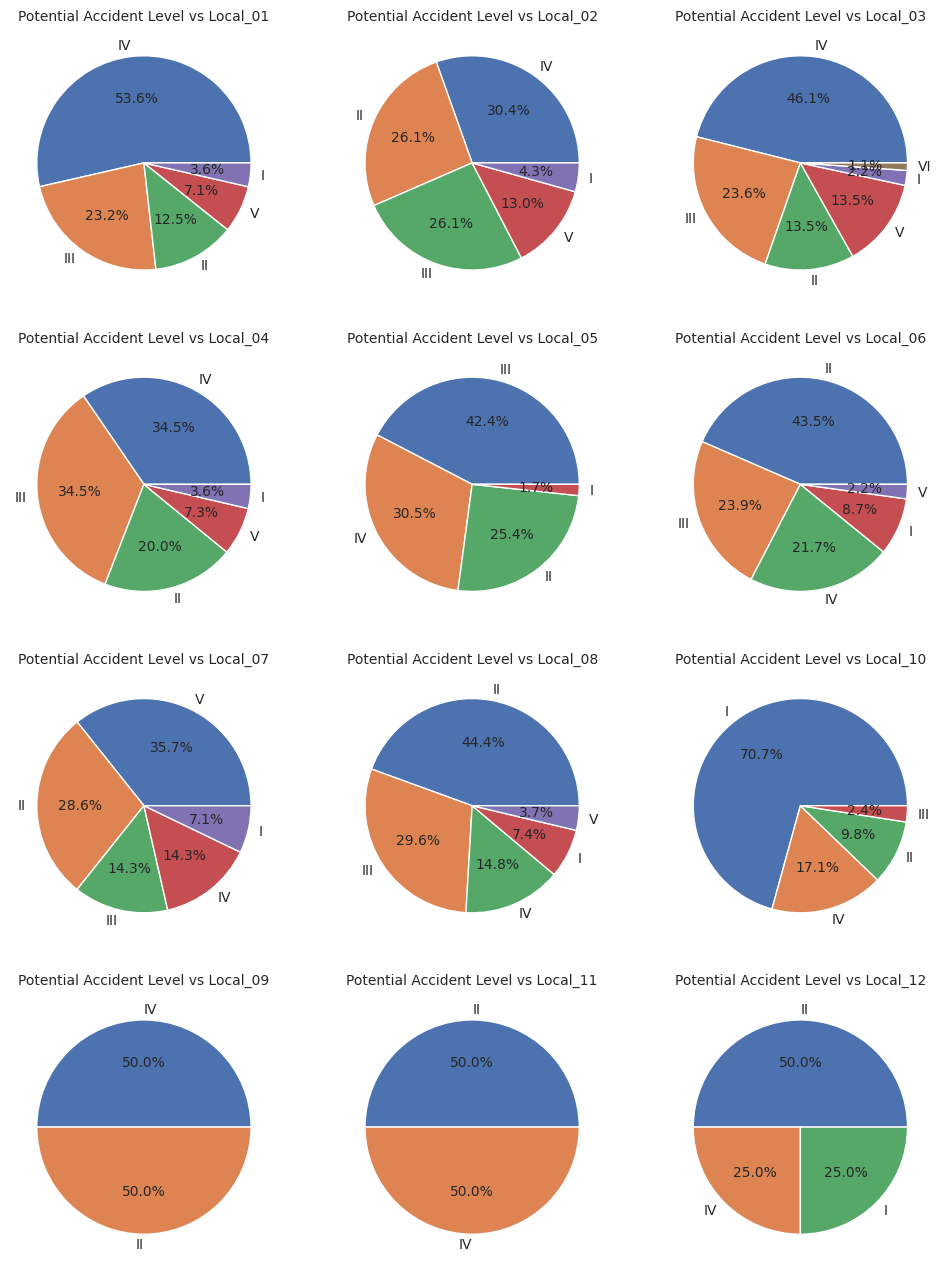

In [48]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Location',targetColumn,targetColumnName,3)

1.   Majority of potential accidents in all localities are level 1 accidents.

2. Local_09 and local_11 observed have only level 1 and 3 potential accidents, that too in equal proportion.


In [49]:
plot_accident_levels(df_proc_1, 'Location',targetColumn,targetColumnName )

##### Accidents by Industry Sector

In [50]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Industry_Sector', targetColumn,targetColumnName,3)

1. Mining sector has highest proportion of level 4 and level 5 accidents among all the sectors.
2. Proportion of level 1 accidents is highest in Others Sector.

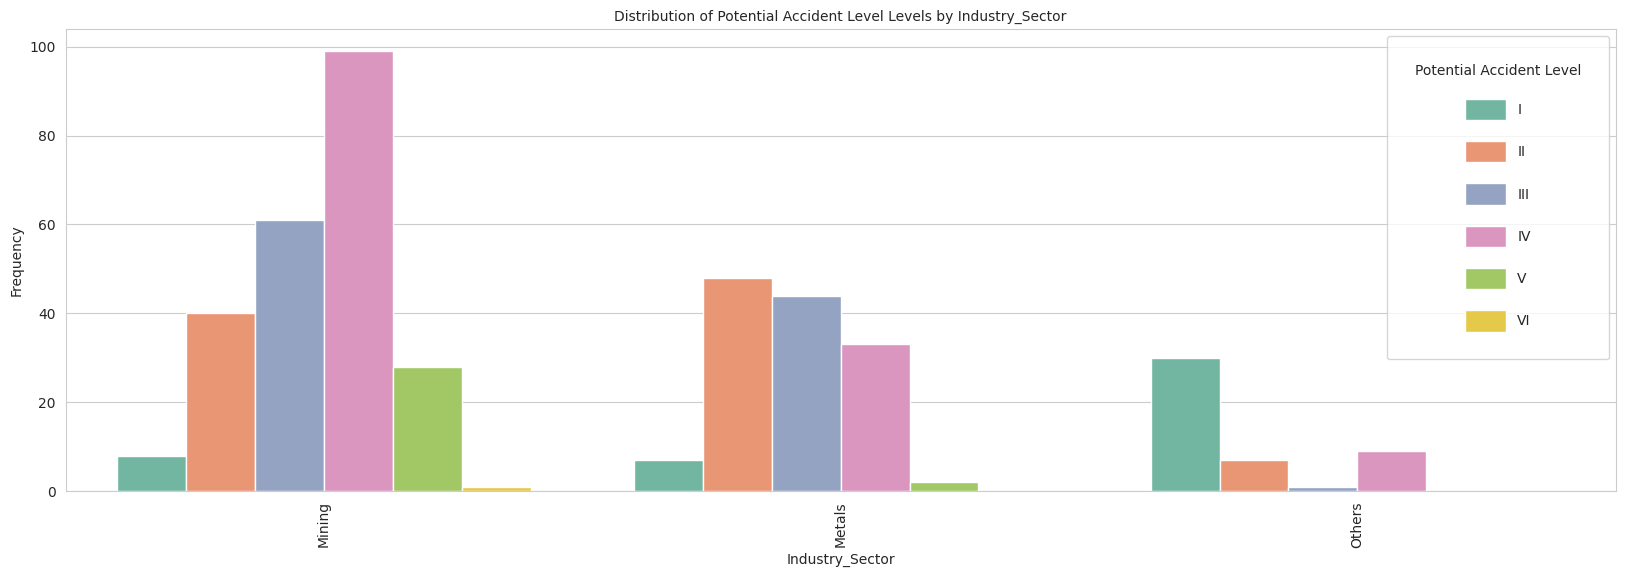

In [51]:
plot_accident_levels(df_proc_1, 'Industry_Sector',targetColumn,targetColumnName )

##### Accidents by Gender

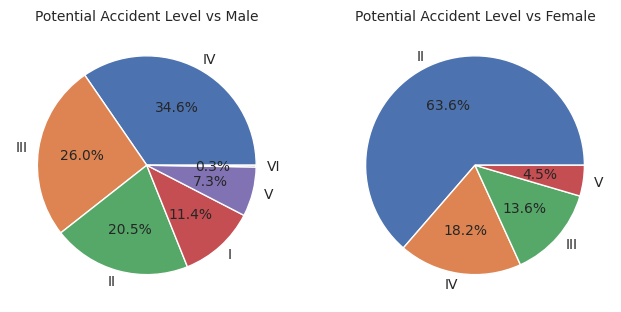

In [52]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Gender', targetColumn,targetColumnName,3)

1. Men have faced more severe accidents than women.
2. Around 10% of overall accidents faced by men are level 4 and level 5 accidents, whereas women did not face any level 4 or 5 accident.
3. More than 80% of accidents faced by women are level 1 accidents.

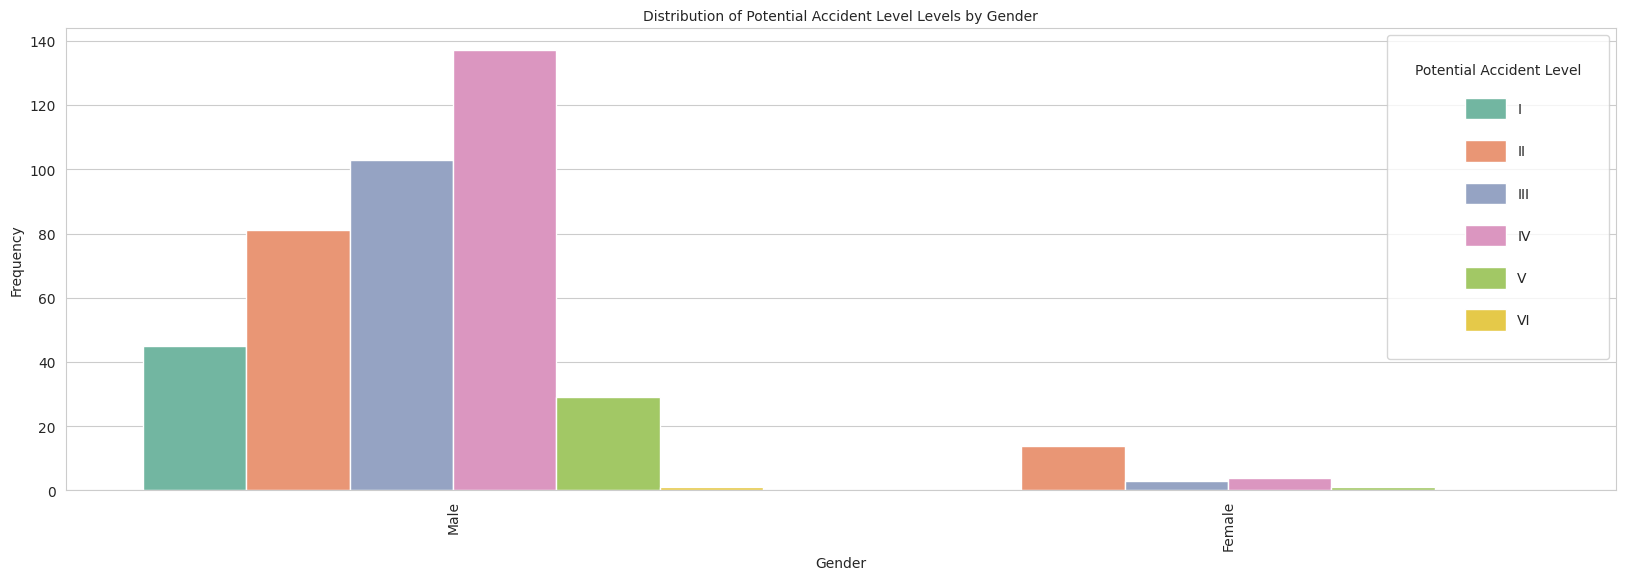

In [53]:
plot_accident_levels(df_proc_1, 'Gender',targetColumn,targetColumnName )

##### Accidents by Employee Type

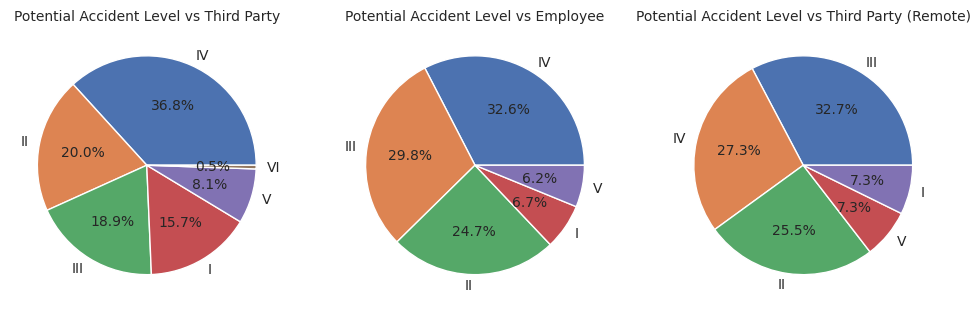

In [54]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Employee_Type', targetColumn,targetColumnName,3)

1. Level 1 accidents for all employee types is over 70%.
2. Internal employees did not face any level 5 accident, whereas proportion of level 5 accidents for both Third Party and Third Party remote is roughly the same.
3. This tells us that it is slightly more risky to be a Third party or remote employee than to be an internal employee.

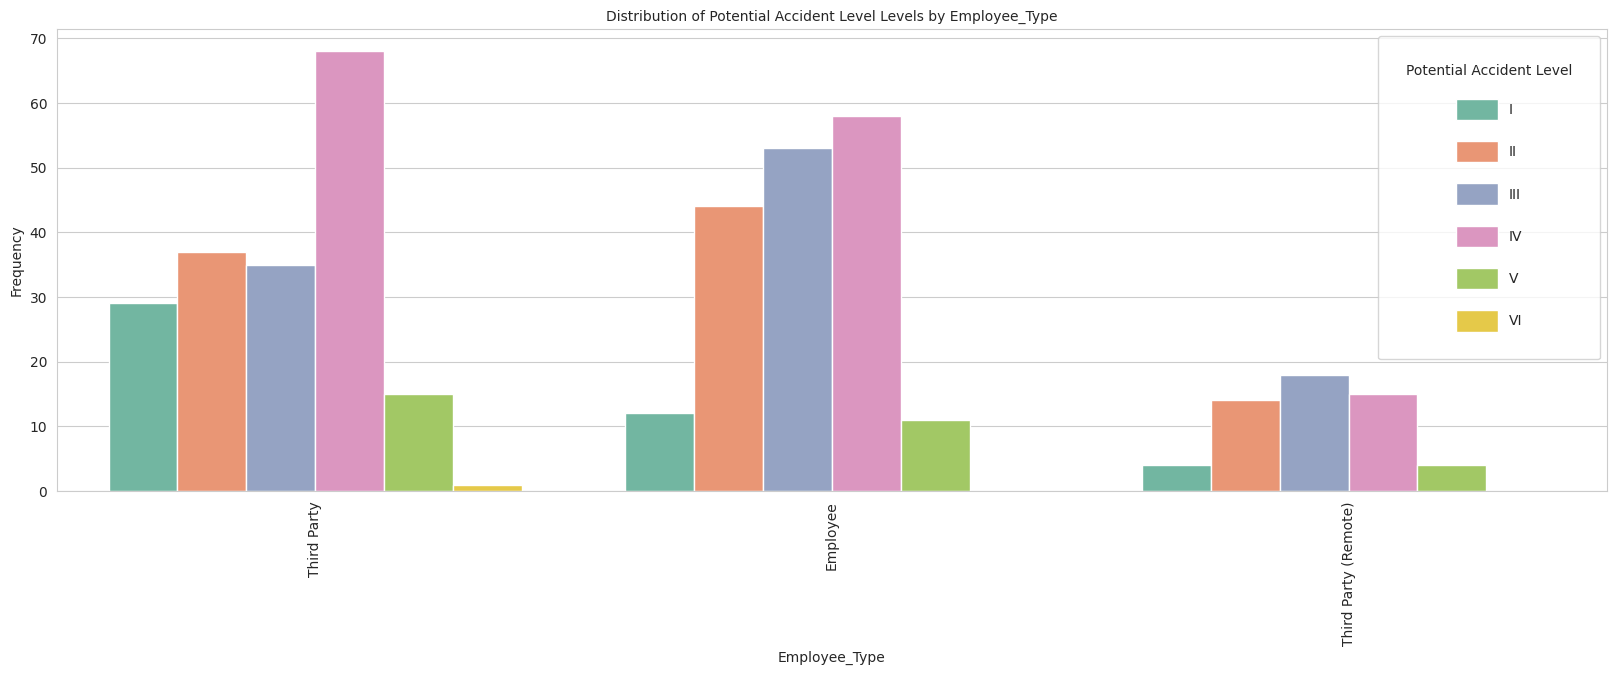

In [55]:
plot_accident_levels(df_proc_1, 'Employee_Type',targetColumn,targetColumnName )

##### Accidents by Critical Risk

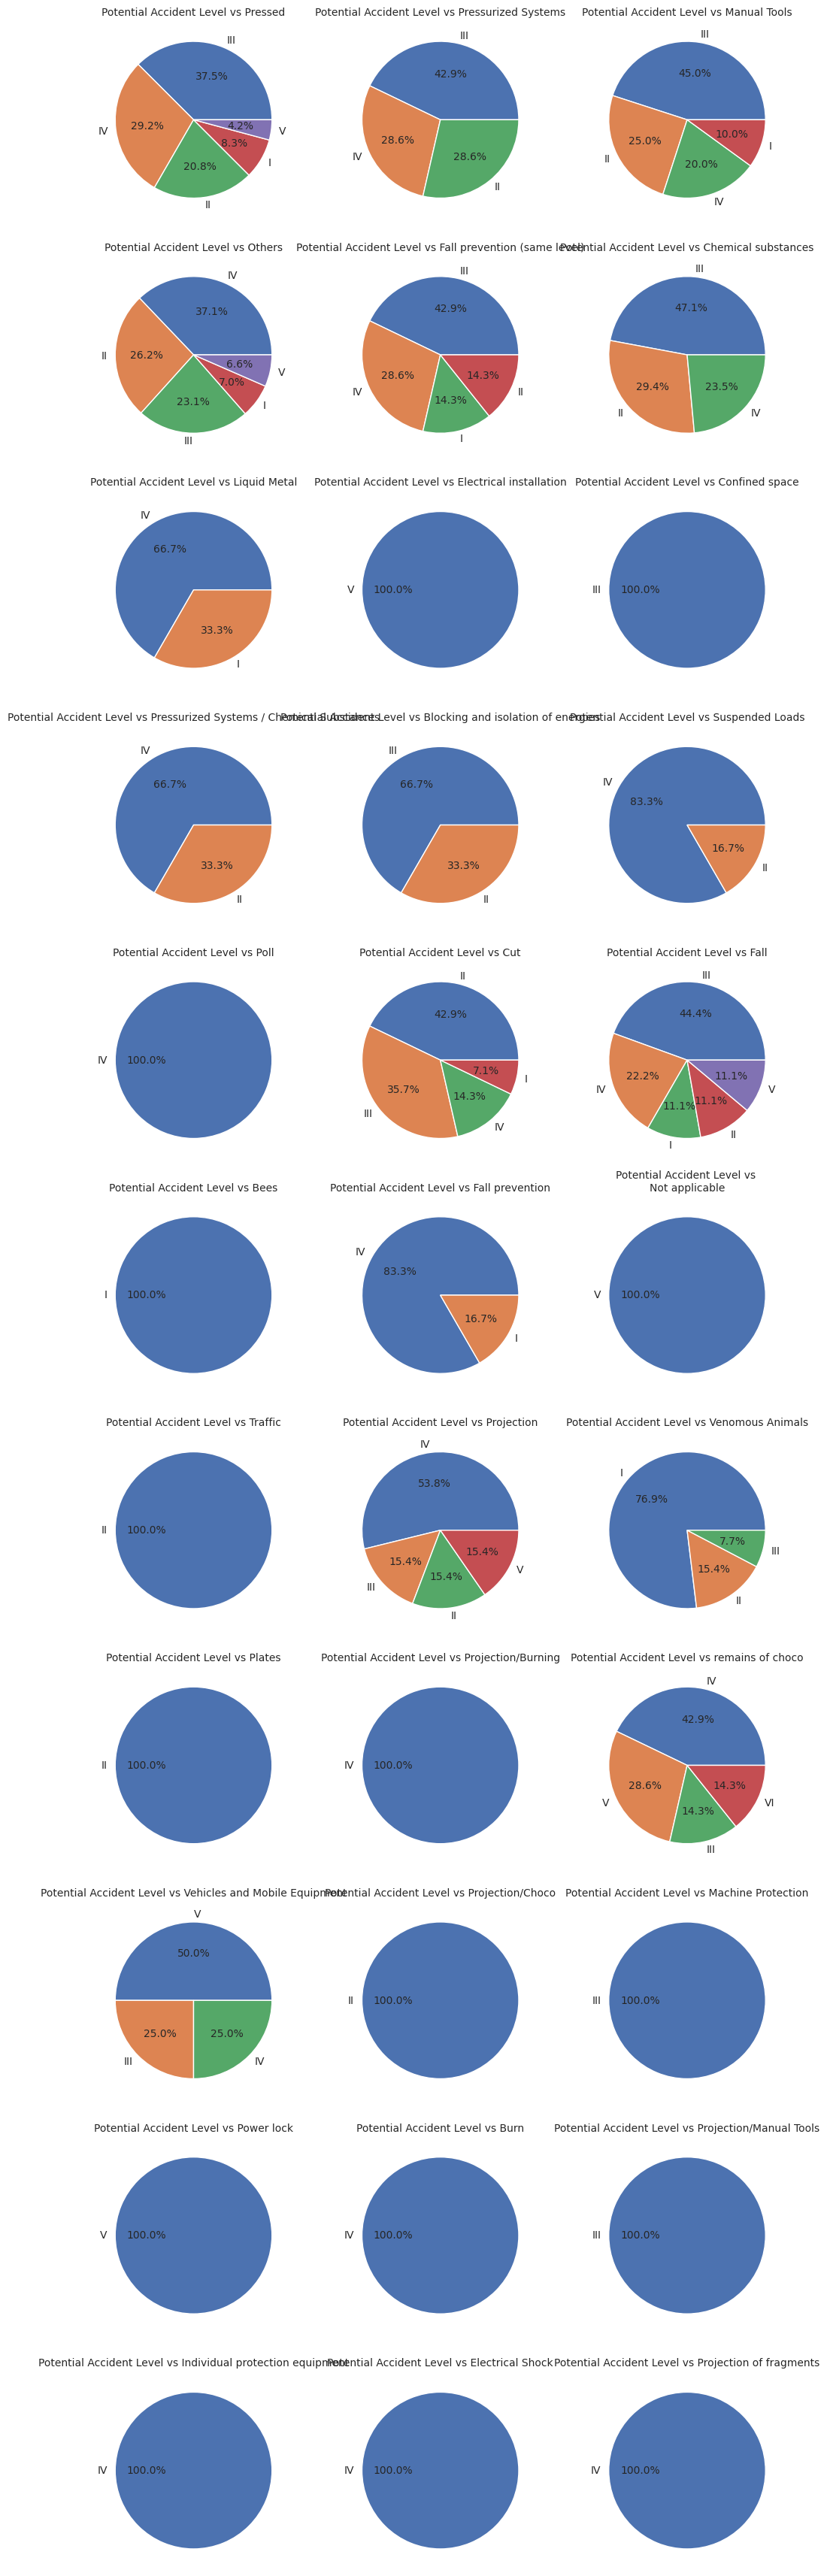

In [56]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Critical_Risk', targetColumn,targetColumnName,3)

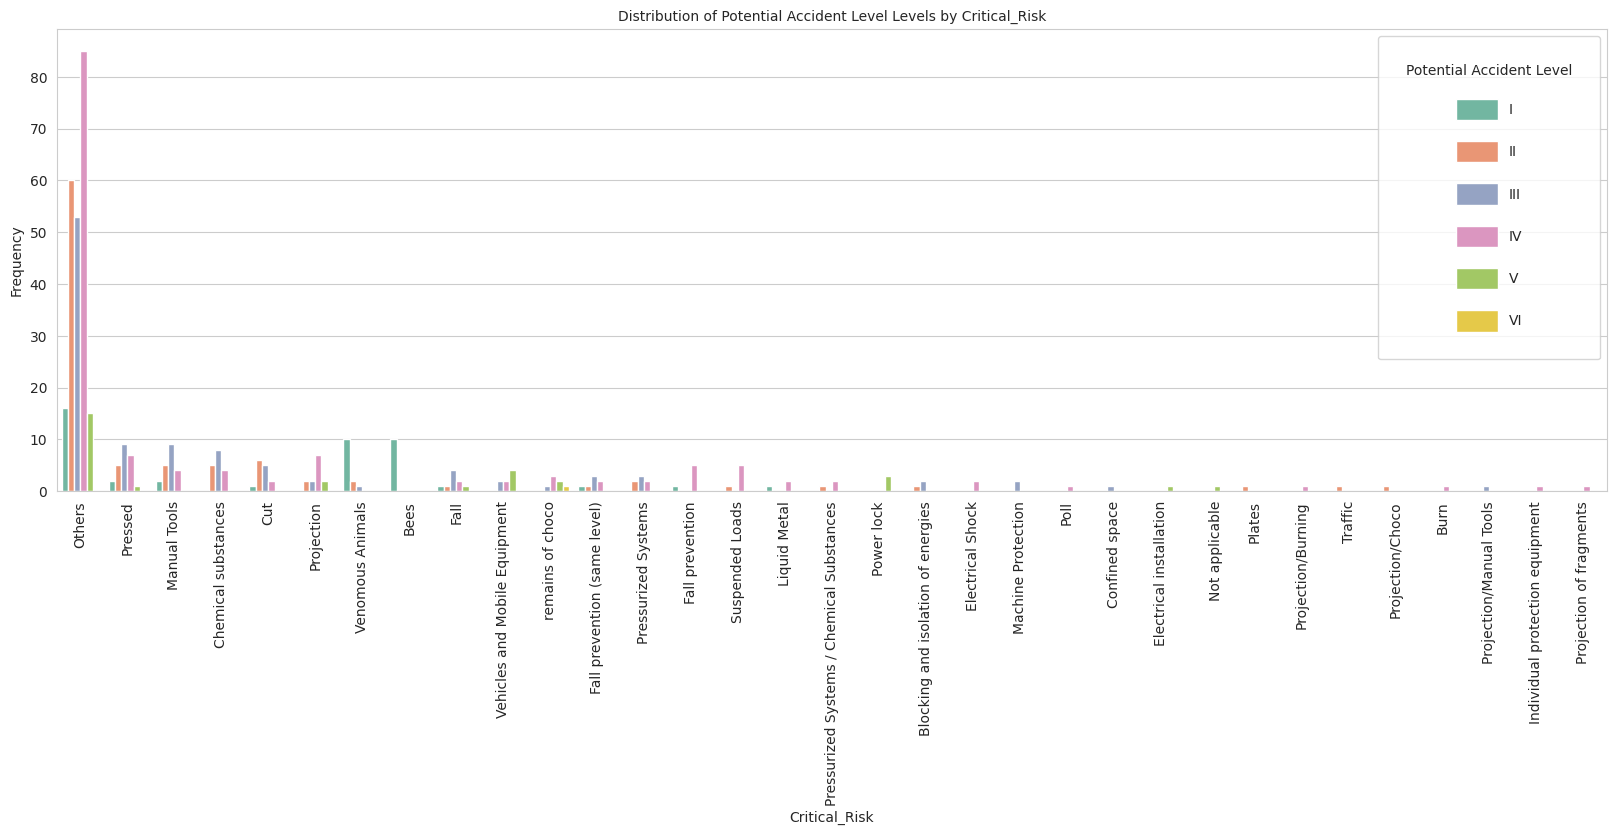

In [57]:
plot_accident_levels(df_proc_1, 'Critical_Risk',targetColumn,targetColumnName )

##### Accidents by Month

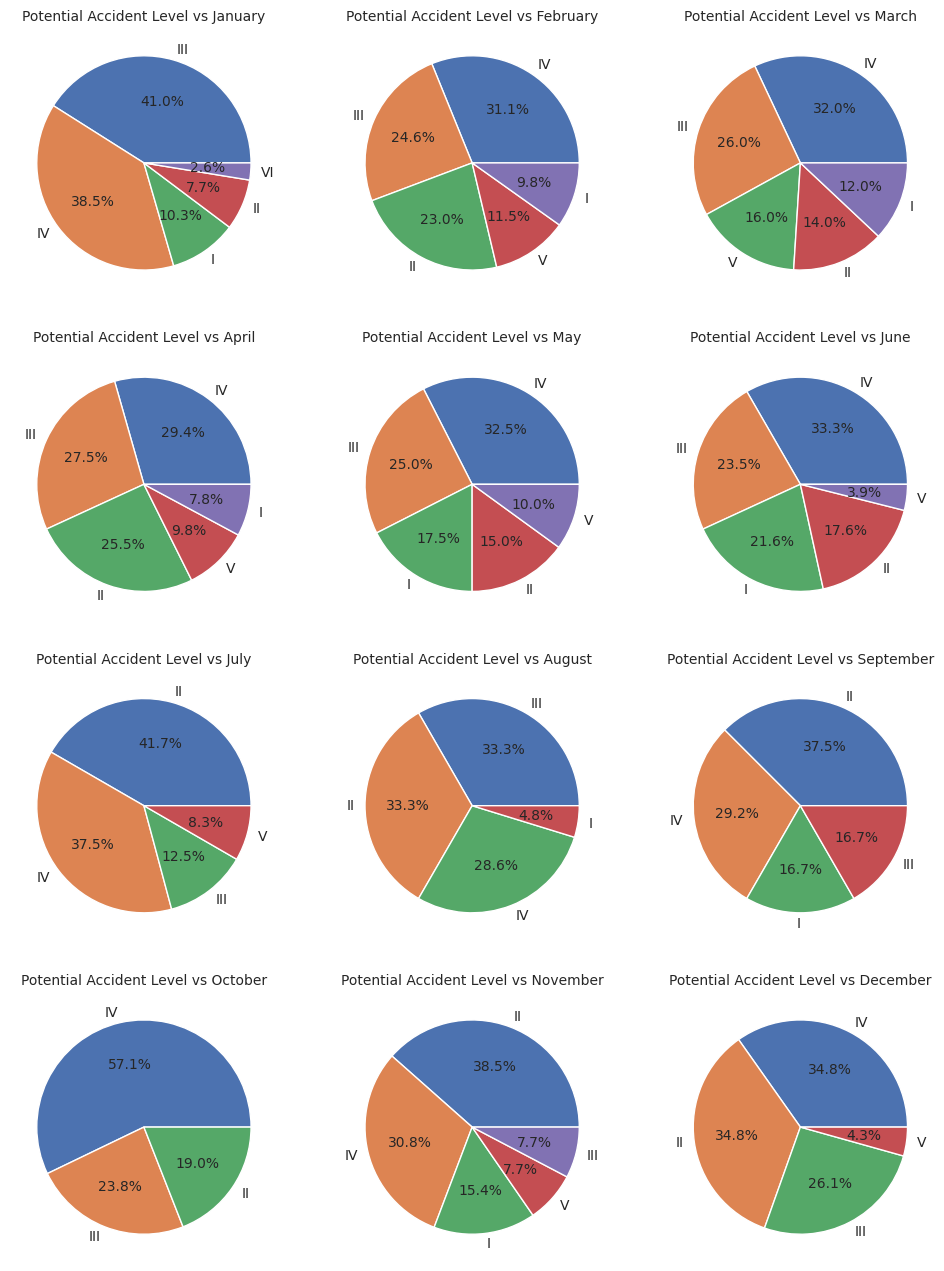

In [58]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Month', targetColumn,targetColumnName,3)

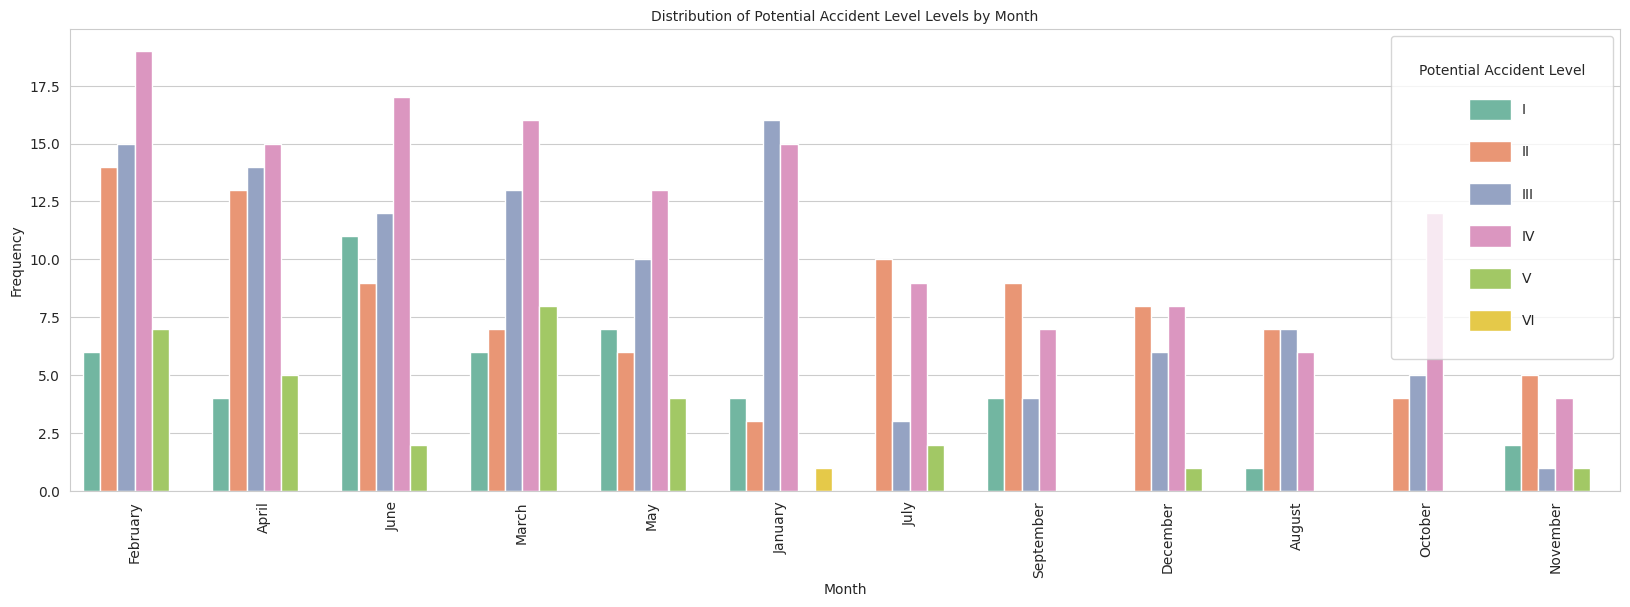

In [59]:
plot_accident_levels(df_proc_1, 'Month',targetColumn,targetColumnName )

##### Accidents by Weekday

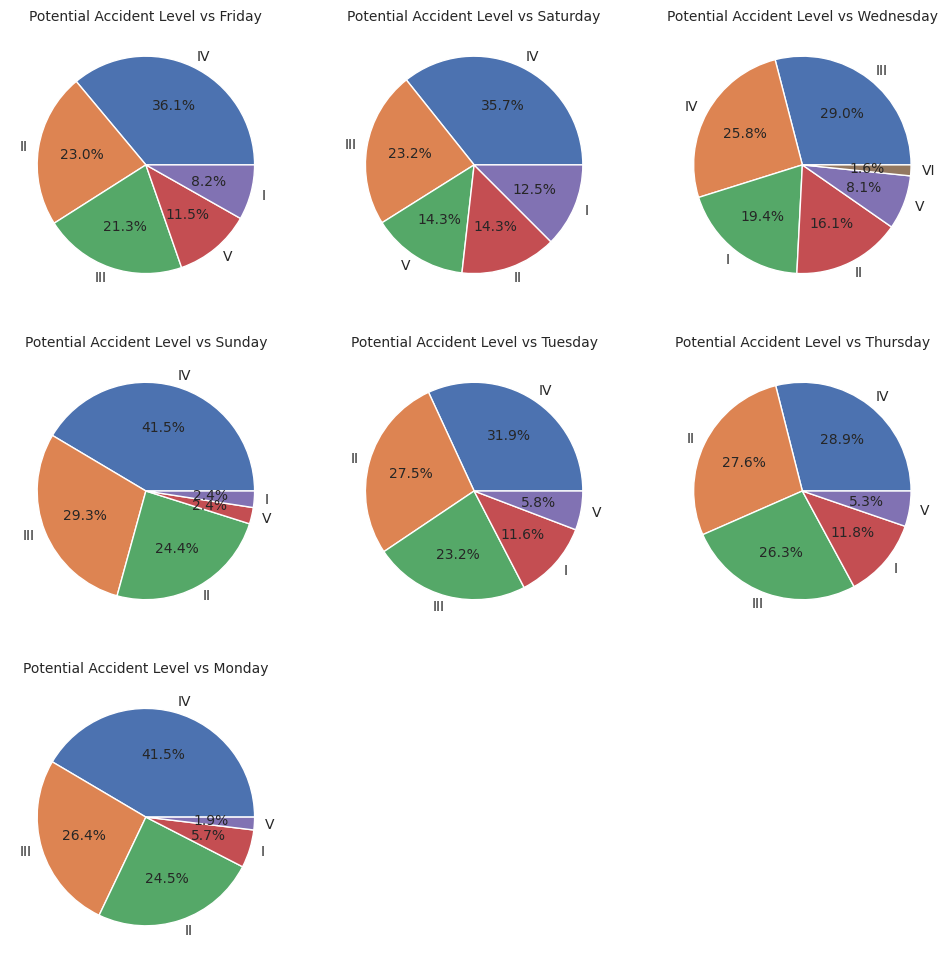

In [60]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Weekday', targetColumn,targetColumnName,3)

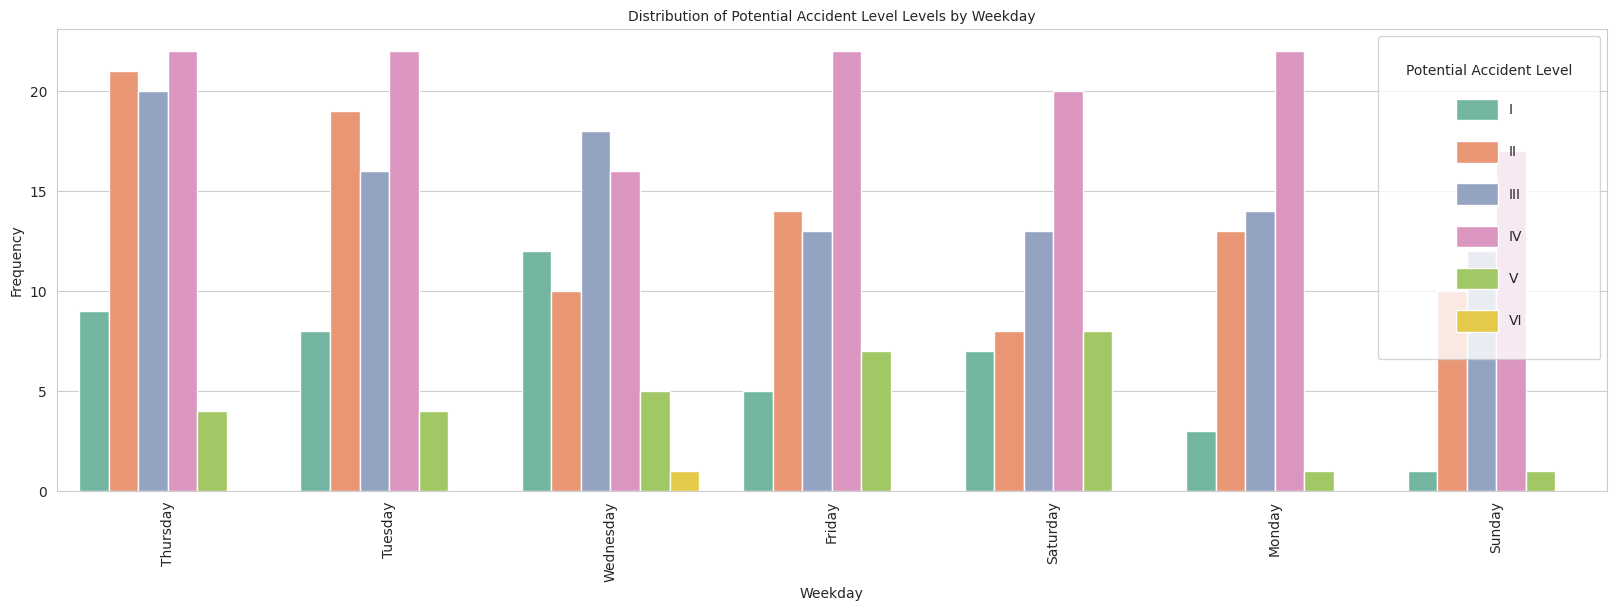

In [61]:
plot_accident_levels(df_proc_1, 'Weekday',targetColumn,targetColumnName )

#### **Relationship between Accident Level and Potential Accident Level**

Convert the ordinal levels of `Accident Level` and `Potential Accident Level` from Roman to integers.

In [62]:
# Convert ordinal levels to numeric
df_proc_2 = df_proc_1.copy()

ordinal_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

df_proc_2['Accident_Level'] = df_proc_2['Accident_Level'].map(ordinal_mapping)
df_proc_2['Potential_Accident_Level'] = df_proc_2['Potential_Accident_Level'].map(ordinal_mapping)

# Print the unique values of Accident_Level and Potential_Accident_Level
unique_values(df_proc_2.loc[:, ['Accident_Level', 'Potential_Accident_Level']])

Accident_Level: [1 4 3 2 5]
-----------------------------------
Potential_Accident_Level: [4 3 1 2 5 6]
-----------------------------------


In [63]:
pd.crosstab(df_proc_2['Accident_Level'], df_proc_2['Potential_Accident_Level'])

Potential_Accident_Level   1   2   3   4  5  6
Accident_Level                                
1                         45  88  89  78  9  0
2                          0   7  14  16  3  0
3                          0   0   3  26  2  0
4                          0   0   0  21  9  0
5                          0   0   0   0  7  1

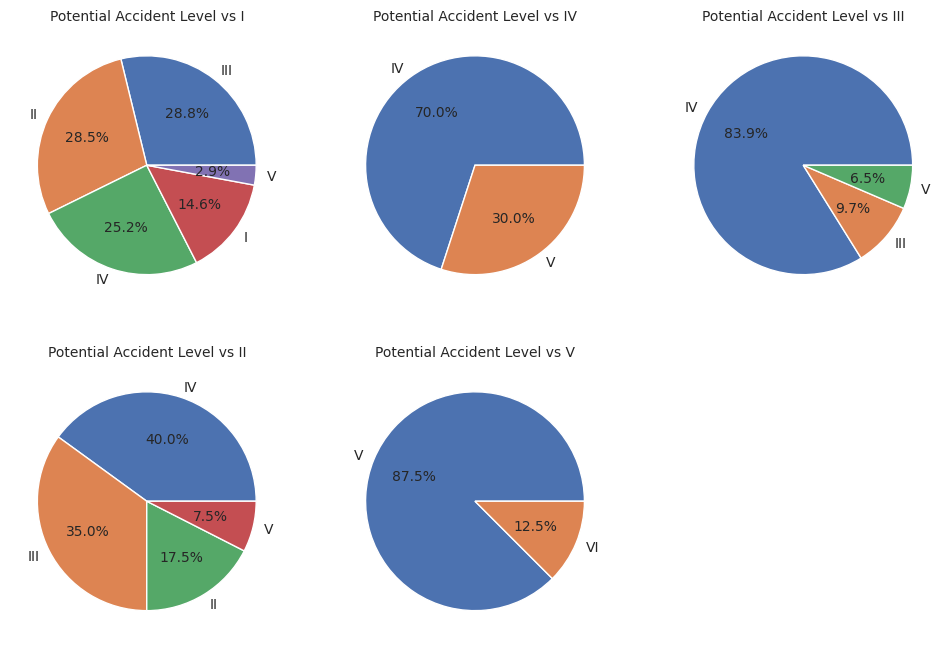

In [64]:
plot_pieChartshowAllPiesForColumn(df_proc_1,'Accident_Level', 'Potential_Accident_Level','Potential Accident Level', 3)

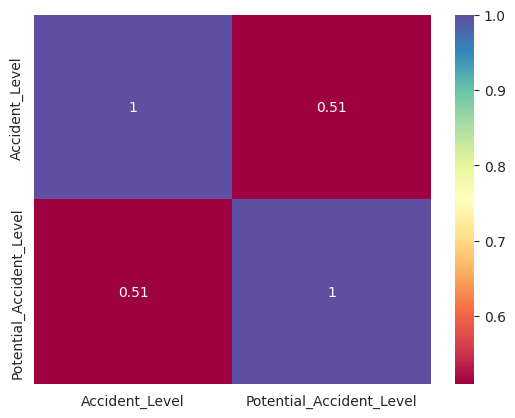

In [65]:
# Visualizing a heatmap to show correlation between 'Accident Level' & 'Potential Accident Level'

sns.heatmap(df_proc_2[['Accident_Level','Potential_Accident_Level']].corr(),annot=True,cmap='Spectral');

In [66]:
print('Between Accident_Level and Potential_Accident_Level:')

# Calculate the Pearson correlation coefficient for Accident_Level and Potential_Accident_Level
person_correlation = df_proc_2['Accident_Level'].corr(df_proc_2['Potential_Accident_Level'])
print(f'The Pearson correlation coefficient is {person_correlation:.2f}')

# Calculate the Spearman correlation coefficient for Accident_Level and Potential_Accident_Level
spearman_correlation = df_proc_2['Accident_Level'].corr(df_proc_2['Potential_Accident_Level'], method='spearman')
print(f'The Spearman correlation coefficient is {spearman_correlation:.2f}')

Between Accident_Level and Potential_Accident_Level:
The Pearson correlation coefficient is 0.51
The Spearman correlation coefficient is 0.50


In [67]:
# finding the average accident level across industry sectors

df_proc_2.groupby('Industry_Sector')['Accident_Level'].mean()

Industry_Sector
Metals    1.380597
Mining    1.662447
Others    1.340426
Name: Accident_Level, dtype: float64

In [68]:
# finding the average potential accident level across industry sectors

df_proc_2.groupby('Industry_Sector')['Potential_Accident_Level'].mean()

Industry_Sector
Metals    2.813433
Mining    3.430380
Others    1.765957
Name: Potential_Accident_Level, dtype: float64

The accident levels are more fatal in Mining industry.

**Observation and Inference:**
- Both correlation coefficients (0.51 for Pearson and 0.50 for Spearman) suggest a **_moderate positive relationship_** between `Accident_Level` and `Potential_Accident_Level`. This indicates that higher levels of accidents are likely associated with higher potential levels of accidents.
- The similarity in values (0.51 for Pearson and 0.50 for Spearman) suggests that the relationship is reasonably **_consistent across both linear and monotonic assessments_**. This consistency strengthens the reliability of the observed association.

**Given the requirement for this project, we would drop the column `Accident_Level` and consider `Potential_Accident_Level` as the target variable.**

#### **Setting the target column based on the observations**

In [69]:
# targetColumn= "Accident_Level"
targetColumn= "Potential_Accident_Level"
notTargetColumn= "Accident_Level"

In [70]:
# Drop the 'Potential Accident_Level' column
df_processed = df_proc_2.drop(columns=[notTargetColumn])
display(df_processed.sample(3))

Country  Location Industry_Sector  Potential_Accident_Level Gender  \
379  Country_02  Local_02          Mining                         2   Male   
50   Country_01  Local_06          Metals                         4   Male   
348  Country_01  Local_03          Mining                         4   Male   

            Employee_Type                    Critical_Risk  \
379  Third Party (Remote)                           Others   
50            Third Party                  Suspended Loads   
348           Third Party  Individual protection equipment   

                                                                                                                                                                                                                                                                                                                                                                                                              Description  \
379                                                                                                                                                            Employee was engaged in adjusting metallic shapes using a tether, and striking the shape, the tether cable hit the lifeline, projecting its hand into the metal structure of the shape, causing a superficial injury to the ring finger of the right hand.   
50                                                                                                                              The operator was feeding a bag of big bag containing scraps of Zn sheets. During lifting, this loaded bag is released from the hook of the hoist, making abrupt contact with the liquid zinc of the furnace, generating an explosion and causing the operator to be hit with liquid zinc.   
348  In the Nv. 2930 - Chamber of accumulation of aggregates: When the worker, made the cast of shotcrete towards the crown of the work, at 2:00 p.m. he perceives discomfort and fogging of the full face, then decides to take it off and chooses to use only his safety glasses for comfort to continue with the thrown shotcrete, at 3:45 p.m. suffers the projection of shotcrete rebound particles in the left eye.   

     Month    Weekday  
379    May     Friday  
50   March  Wednesday  
348  March     Friday

#### Encode the target variable using Ordinal Encoding

In [71]:
df_processed[targetColumn].value_counts()

Potential_Accident_Level
4    141
3    106
2     95
1     45
5     30
6      1
Name: count, dtype: int64

Let us observe the single row having Potential_Accident_Level as 6

In [72]:
# Display the row with 'Potential Accident Level' of 6
df_proc_2[df_proc_2[targetColumn] == 6]

Country  Location Industry_Sector  Accident_Level  \
304  Country_01  Local_03          Mining               5   

     Potential_Accident_Level Gender Employee_Type     Critical_Risk  \
304                         6   Male   Third Party  remains of choco   

                                                                                                                                                                                                                                                                                                                                                                                                     Description  \
304  During the process of loading drills in the Carmen pit of level 3450, the operator positions the basket of the anfo loader 186 equipment at a height of 3m from the floor to carry out the loading of the production drills; At this moment, a stone slab of 1.4x0.7x0.2 m is detached from the front of the pit, which is tilted and lodged inside the basket, trapping the right leg of the collaborator.   

       Month    Weekday  
304  January  Wednesday

In [73]:
# Display other records having same 'Sector', 'Locality', 'Critical Risk' and 'Gender' as the record with 'Potential Accident Level' of 6
level6_sector = df_proc_2[df_proc_2[targetColumn] == 6]['Industry_Sector'].values[0]
level6_location = df_proc_2[df_proc_2[targetColumn] == 6]['Location'].values[0]
level6_risk = df_proc_2[df_proc_2[targetColumn] == 6]['Critical_Risk'].values[0]
level6_gender = df_proc_2[df_proc_2[targetColumn] == 6]['Gender'].values[0]


df_proc_2[(df_proc_2['Industry_Sector'] == level6_sector) & (df_proc_2['Location'] == level6_location) & (df_proc_2['Critical_Risk'] == level6_risk) & (df_proc_2['Gender'] == level6_gender)]

Country  Location Industry_Sector  Accident_Level  \
295  Country_01  Local_03          Mining               1   
304  Country_01  Local_03          Mining               5   
314  Country_01  Local_03          Mining               2   
338  Country_01  Local_03          Mining               2   

     Potential_Accident_Level Gender Employee_Type     Critical_Risk  \
295                         3   Male      Employee  remains of choco   
304                         6   Male   Third Party  remains of choco   
314                         5   Male      Employee  remains of choco   
338                         4   Male   Third Party  remains of choco   

                                                                                                                                                                                                                                                                                                                                                                                                     Description  \
295                            At level 3450, Tajo area 2; after completing the drilling of drills for loading; the operator removes the bit from the jumbo arm and walks towards the crew cabin; from the crown of the work a fragment of rock that passes through the cocada of the mesh of 3 "and impacts on its helmet and rebound hits the right shoulder of the operator, generating the described injury.   
304  During the process of loading drills in the Carmen pit of level 3450, the operator positions the basket of the anfo loader 186 equipment at a height of 3m from the floor to carry out the loading of the production drills; At this moment, a stone slab of 1.4x0.7x0.2 m is detached from the front of the pit, which is tilted and lodged inside the basket, trapping the right leg of the collaborator.   
314          In Level 2900 - OP 5 the worker performed the chuteo ore from the hopper to the second car, perceived a slip of water and mud through the hopper, decided to leave the platform and when he was already down the second rung of the ladder of access, the water increases and a fragment of rock slides and hits the back of the worker causing it to fall and hit the right forearm and left knee.   
338                                                                      In the area of ​​Lloclla 50 meters from the sub-station Nro 4, under circumstances that the worker was preparing to pick up the rope from the floor, several fragments of rock slide down the slope of the hill, one of the 5 cm fragments of Diameter approximately impacts the face of the worker producing the aforementioned injury   

        Month    Weekday  
295   January    Tuesday  
304   January  Wednesday  
314  February    Tuesday  
338  February     Monday

From visual analysis of the data, we would make the level 6 as 5 instead.

In [74]:
# Change the level of 'Potential Accident Level' from 6 to 5 for the single row
df_processed['Potential_Accident_Level'] = df_processed['Potential_Accident_Level'].replace(6, 5)


The `Potential_Accident_Level` has inherent order representing increasing severity. Maintaining the numerical relationship is important for analysis. Hence we would proceed with **Ordinal Encoding**

In [75]:
def ordinal_encoding(df, column, levels=None):
    if levels is None:
        levels = sorted(df[column].unique())

    # Create mapping dictionary
    mapping = {val: idx for idx, val in enumerate(levels)}

    # Apply mapping
    df[f'{column}_encoded'] = df[column].map(mapping)

    return df, mapping

In [76]:
targetColumn

'Potential_Accident_Level'

In [77]:
df_accidentLevel_encoded = df_processed.copy()

levels = [1, 2, 3, 4, 5]  # Define the order
df_accidentLevel_encoded, level_mapping = ordinal_encoding(df_accidentLevel_encoded, targetColumn, levels)

In [78]:
print(f'Level Mapping: {level_mapping}')

Level Mapping: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}


In [79]:
df_accidentLevel_encoded.drop(columns=[targetColumn], inplace=True)
df_accidentLevel_encoded.sample(3)

Country  Location Industry_Sector Gender Employee_Type  \
153  Country_02  Local_08          Metals   Male      Employee   
189  Country_01  Local_01          Mining   Male   Third Party   
124  Country_03  Local_10          Others   Male   Third Party   

        Critical_Risk  \
153  \nNot applicable   
189            Others   
124              Fall   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Description  \
153                                                            At approximately 5:45 pm, the operator Paulo (operator of the filters) informed the autoclave operator via radio of a leak on the side of the scruber. The autoclave III feed was stopped by the control and officials Georli and Renato initiated the procedures for closing the autoclave transfer valve for flash TQs. Soon after, there was a break in the chicken, projecting pulp hot and reaching three employees who were inside the room near the equipment.   
189  In circumstances, the drilling assistants proceeded to assemble the inner tube to the barel; the injured person retracts the inner tube (head) to throw it manually towards the top of the catheter (inclination - 3 °) to continue with the perforation, in that moment the glove of the left hand is hooked in the speart point pushing his left hand until the edge of the box of the barel, originating the injury. At the time of the accident the injured employee used his rubber gloves and the work area was well lit.   
124                                                                                                      During field trip, to return to work after lunch, the employee of the Wellfield company slipped on the loose stones that were in the place. At that moment, with the intention of balancing, he tried hold onto a tree, falling under the right arm causing fracture at the distal end of the radius. The activity was paralyzed and the employee was referred to the Hospital in Paracatu where he underwent medical care.   

      Month  Weekday  Potential_Accident_Level_encoded  
153    June   Friday                                 4  
189  August   Sunday                                 3  
124     May  Tuesday                                 3

In [80]:
# rename column to Potential_Accident_Level
df_processed = df_accidentLevel_encoded.copy()
df_processed.rename(columns={f'{targetColumn}_encoded': targetColumn}, inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country                   418 non-null    object
 1   Location                  418 non-null    object
 2   Industry_Sector           418 non-null    object
 3   Gender                    418 non-null    object
 4   Employee_Type             418 non-null    object
 5   Critical_Risk             418 non-null    object
 6   Description               418 non-null    object
 7   Month                     418 non-null    object
 8   Weekday                   418 non-null    object
 9   Potential_Accident_Level  418 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 32.8+ KB


In [81]:
df_NLP = df_processed.copy()

In [82]:
df_NLP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country                   418 non-null    object
 1   Location                  418 non-null    object
 2   Industry_Sector           418 non-null    object
 3   Gender                    418 non-null    object
 4   Employee_Type             418 non-null    object
 5   Critical_Risk             418 non-null    object
 6   Description               418 non-null    object
 7   Month                     418 non-null    object
 8   Weekday                   418 non-null    object
 9   Potential_Accident_Level  418 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 32.8+ KB


## **Feature Selection for Basic Machine Learning Model**
We already have dropped columns like `Date` which we feel would not contribute to model predictions, and `Accident_Level` as it was similar to `Potential_Accident_level`.
From our EDA above, we would further drop columns:
- `Country` - It has been specified that we are presented with data from Brazil, and not from other countries.
- `Critical_Risk` - This is just a classification of the description column.

Additionally, since we would be training a basic machine learning model, let us drop the `Description` for time being.


In [ ]:
# Drop the columns 'Country', 'Critical_Risk' and 'Description'
df_basicModel_1 = df_processed.drop(columns=['Country', 'Critical_Risk', 'Description'])
df_basicModel_1.info() # Will be using this dataframe further for training the Basic ML Model


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Location                  418 non-null    object
 1   Industry_Sector           418 non-null    object
 2   Gender                    418 non-null    object
 3   Employee_Type             418 non-null    object
 4   Month                     418 non-null    object
 5   Weekday                   418 non-null    object
 6   Potential_Accident_Level  418 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 23.0+ KB


### Encode the categorical features

#### Location

In [ ]:
print(df_basicModel_1['Location'].unique())

['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


For locations we have observed -
1. Locations are anonymized but numbered sequentially from `Local_01` to `Local_12`
2. Some locations have significantly higher accident rates than others and the distribution is highly skewed.

We would proceed with **Frequency encoding** for `Location`.

In [ ]:
def frequency_encoding(df, column):
    freq_map = df[column].value_counts(normalize=True).to_dict()
    df[f'{column}_freq'] = df[column].map(freq_map)

In [ ]:
df_basic_locationFreq = df_basicModel_1.copy()
# Choose either frequency or label encoding based on your needs
frequency_encoding(df_basic_locationFreq, 'Location')

In [ ]:
df_basic_locationFreq.drop(columns=['Location'], inplace=True)
df_basic_locationFreq.head(3)

Industry_Sector Gender         Employee_Type    Month    Weekday  \
0          Mining   Male           Third Party  January     Friday   
1          Mining   Male              Employee  January   Saturday   
2          Mining   Male  Third Party (Remote)  January  Wednesday   

   Potential_Accident_Level  Location_freq  
0                         3       0.133971  
1                         3       0.055024  
2                         2       0.212919

#### Industry_sector

In [ ]:
print(df_basicModel_1['Industry_Sector'].unique())

['Mining' 'Metals' 'Others']


Industry sector has only 3 categories and have no inherent ordering. Hence lets proceed with One-Hot encoding.

In [ ]:
def onehot_encoding(df, column):
    # Create dummy variables
    dummies = pd.get_dummies(df[column], prefix=column)

    # Add dummy columns to original dataframe
    df = pd.concat([df, dummies], axis=1)

    return df

In [ ]:
df_basic_industrySector = df_basic_locationFreq.copy()
df_basic_industrySector = onehot_encoding(df_basic_industrySector, 'Industry_Sector')

In [ ]:
df_basic_industrySector.drop(columns=['Industry_Sector'], inplace=True)
df_basic_industrySector.head(3)

Gender         Employee_Type    Month    Weekday  Potential_Accident_Level  \
0   Male           Third Party  January     Friday                         3   
1   Male              Employee  January   Saturday                         3   
2   Male  Third Party (Remote)  January  Wednesday                         2   

   Location_freq  Industry_Sector_Metals  Industry_Sector_Mining  \
0       0.133971                   False                    True   
1       0.055024                   False                    True   
2       0.212919                   False                    True   

   Industry_Sector_Others  
0                   False  
1                   False  
2                   False

#### Employee_Type

In [ ]:
print(df_basicModel_1['Employee_Type'].unique())

['Third Party' 'Employee' 'Third Party (Remote)']


Employee Type has only 3 categories and have no inherent ordering. Hence lets proceed with One-Hot encoding. However before that let us change the values to single words as follows:
- `Employee` remains as is.
- `Third Party` to `Contractor`
- `Third Party (Remote)` to `Contractor_Remote`


In [ ]:
# Change the values of 'Employee_Type' to 'Employee', 'Contractor' and 'Contractor_Remote'
df_basic_employeeType = df_basic_industrySector.copy()

df_basic_employeeType['Employee_Type'] = df_basic_employeeType['Employee_Type'].replace({
    'Third Party':'Contractor',
    'Third Party (Remote)':'Contractor_Remote'
})

df_basic_employeeType = onehot_encoding(df_basic_employeeType, 'Employee_Type')

In [ ]:
df_basic_employeeType.drop(columns=['Employee_Type'], inplace=True)
df_basic_employeeType.head(3)

Gender    Month    Weekday  Potential_Accident_Level  Location_freq  \
0   Male  January     Friday                         3       0.133971   
1   Male  January   Saturday                         3       0.055024   
2   Male  January  Wednesday                         2       0.212919   

   Industry_Sector_Metals  Industry_Sector_Mining  Industry_Sector_Others  \
0                   False                    True                   False   
1                   False                    True                   False   
2                   False                    True                   False   

   Employee_Type_Contractor  Employee_Type_Contractor_Remote  \
0                      True                            False   
1                     False                            False   
2                     False                             True   

   Employee_Type_Employee  
0                   False  
1                    True  
2                   False

#### Gender

For Gender we would proceed with Binary Encoding as it has only 2 values.

In [ ]:
def binary_encoding(df, column, positive_class):
    df[f'{column}_binary'] = (df[column] == positive_class).astype(int)
    return df

In [ ]:
df_basic_gender = df_basic_employeeType.copy()
df_basic_gender = binary_encoding(df_basic_gender, 'Gender', positive_class='Female')

In [ ]:
df_basic_gender.drop(columns=['Gender'], inplace=True)
df_basic_gender

Month    Weekday  Potential_Accident_Level  Location_freq  \
0    January     Friday                         3       0.133971   
1    January   Saturday                         3       0.055024   
2    January  Wednesday                         2       0.212919   
3    January     Friday                         0       0.131579   
4    January     Sunday                         3       0.131579   
..       ...        ...                       ...            ...   
413     July    Tuesday                         2       0.131579   
414     July    Tuesday                         1       0.212919   
415     July  Wednesday                         1       0.004785   
416     July   Thursday                         1       0.141148   
417     July     Sunday                         1       0.131579   

     Industry_Sector_Metals  Industry_Sector_Mining  Industry_Sector_Others  \
0                     False                    True                   False   
1                     False                    True                   False   
2                     False                    True                   False   
3                     False                    True                   False   
4                     False                    True                   False   
..                      ...                     ...                     ...   
413                   False                    True                   False   
414                   False                    True                   False   
415                    True                   False                   False   
416                    True                   False                   False   
417                   False                    True                   False   

     Employee_Type_Contractor  Employee_Type_Contractor_Remote  \
0                        True                            False   
1                       False                            False   
2                       False                             True   
3                        True                            False   
4                        True                            False   
..                        ...                              ...   
413                      True                            False   
414                     False                            False   
415                     False                            False   
416                     False                            False   
417                      True                            False   

     Employee_Type_Employee  Gender_binary  
0                     False              0  
1                      True              0  
2                     False              0  
3                     False              0  
4                     False              0  
..                      ...            ...  
413                   False              0  
414                    True              1  
415                    True              0  
416                    True              0  
417                   False              1  

[418 rows x 11 columns]

#### Month and Weekday

For `Month` and `Weekday` we would proceed with **Cyclical Encoding** as they represent time data.  December is as close to January as November, and Sunday is as close to Monday as Saturday. Cyclical encoding would preserve this cyclical nature of data.

In [ ]:
def cyclical_encoding(df, column, max_val):
    # Convert to normalized values between 0 and 2π
    df[f'{column}_sin'] = np.sin(2 * np.pi * df[column].astype(int) / max_val)
    df[f'{column}_cos'] = np.cos(2 * np.pi * df[column].astype(int) / max_val)

    return df

# Define the dictionary for cyclical encoding
MONTH_DICT = {month: idx+1 for idx, month in
              enumerate(['January', 'February', 'March', 'April',
                        'May', 'June', 'July', 'August', 'September',
                        'October', 'November', 'December'])}

WEEKDAY_DICT = {day: idx+1 for idx, day in
                enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                          'Friday', 'Saturday', 'Sunday'])}

In [ ]:
# Convert months to numbers using the MONTH_DICT
df_basic_month = df_basic_gender.copy()

df_basic_month['Month_Num'] = df_basic_month['Month'].map(MONTH_DICT)
df_basic_month = cyclical_encoding(df_basic_month, 'Month_Num', max_val=12)

In [ ]:
df_basic_month.drop(columns=['Month', 'Month_Num'], inplace=True)
df_basic_month.head(3)

Weekday  Potential_Accident_Level  Location_freq  Industry_Sector_Metals  \
0     Friday                         3       0.133971                   False   
1   Saturday                         3       0.055024                   False   
2  Wednesday                         2       0.212919                   False   

   Industry_Sector_Mining  Industry_Sector_Others  Employee_Type_Contractor  \
0                    True                   False                      True   
1                    True                   False                     False   
2                    True                   False                     False   

   Employee_Type_Contractor_Remote  Employee_Type_Employee  Gender_binary  \
0                            False                   False              0   
1                            False                    True              0   
2                             True                   False              0   

   Month_Num_sin  Month_Num_cos  
0            0.5       0.866025  
1            0.5       0.866025  
2            0.5       0.866025

In [ ]:
# Convert weekdays to numbers using the WEEKDAY_DICT
df_basic_weekday = df_basic_month.copy()

df_basic_weekday['Weekday_Num'] = df_basic_weekday['Weekday'].map(WEEKDAY_DICT)
df_basic_weekday = cyclical_encoding(df_basic_weekday, 'Weekday_Num', max_val=7)

In [ ]:
df_basic_weekday.drop(columns=['Weekday', 'Weekday_Num'], inplace=True)
df_basic_weekday.head(3)

Potential_Accident_Level  Location_freq  Industry_Sector_Metals  \
0                         3       0.133971                   False   
1                         3       0.055024                   False   
2                         2       0.212919                   False   

   Industry_Sector_Mining  Industry_Sector_Others  Employee_Type_Contractor  \
0                    True                   False                      True   
1                    True                   False                     False   
2                    True                   False                     False   

   Employee_Type_Contractor_Remote  Employee_Type_Employee  Gender_binary  \
0                            False                   False              0   
1                            False                    True              0   
2                             True                   False              0   

   Month_Num_sin  Month_Num_cos  Weekday_Num_sin  Weekday_Num_cos  
0            0.5       0.866025        -0.974928        -0.222521  
1            0.5       0.866025        -0.781831         0.623490  
2            0.5       0.866025         0.433884        -0.900969

In [ ]:
# Copy the data into a new dataframe
df_basicModel_2 = df_basic_weekday.copy()
df_basicModel_2.info()

df_processed = df_basic_weekday.copy()
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Potential_Accident_Level         418 non-null    int64  
 1   Location_freq                    418 non-null    float64
 2   Industry_Sector_Metals           418 non-null    bool   
 3   Industry_Sector_Mining           418 non-null    bool   
 4   Industry_Sector_Others           418 non-null    bool   
 5   Employee_Type_Contractor         418 non-null    bool   
 6   Employee_Type_Contractor_Remote  418 non-null    bool   
 7   Employee_Type_Employee           418 non-null    bool   
 8   Gender_binary                    418 non-null    int64  
 9   Month_Num_sin                    418 non-null    float64
 10  Month_Num_cos                    418 non-null    float64
 11  Weekday_Num_sin                  418 non-null    float64
 12  Weekday_Num_cos       

### Split the features into X and Y, and further in train, validation and test

In [ ]:
# Split the dataframe in X and Y
#targetColumn = targetColumn #+'_encoded'
X = df_basicModel_2.drop(columns=[targetColumn])
y = df_basicModel_2[targetColumn]

In [ ]:
# Split the data into train, validation and test sets ensuring we have representative samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Print the shape of the train, validation and test sets
print(f'Train set: {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Validation set: {X_val.shape[0]} rows and {X_val.shape[1]} columns')
print(f'Test set: {X_test.shape[0]} rows and {X_test.shape[1]} columns')

Train set: 267 rows and 12 columns
Validation set: 67 rows and 12 columns
Test set: 84 rows and 12 columns


In [ ]:
y_train.value_counts()

Potential_Accident_Level
3    89
2    68
1    61
0    29
4    20
Name: count, dtype: int64

### Upsampling the minority class.

In [ ]:
y_train.value_counts(normalize=True)

Potential_Accident_Level
3    0.333333
2    0.254682
1    0.228464
0    0.108614
4    0.074906
Name: proportion, dtype: float64

We have seen very low numbers of the Accident levels 1 - 4. Let us up-sample these categories.

In [ ]:
# Upsample the minority classes in the Accident_Level - 3, 4 and 5 - in the training set
from imblearn.over_sampling import SMOTE

majority_class_count = y_train.value_counts().max()
desired_ratios = {1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}
sampling_strategy = {cls: int(majority_class_count * ratio) for cls, ratio in desired_ratios.items()}

# Find the minimum number of samples in the minority classes
minority_class_counts = y_train.value_counts()[list(desired_ratios.keys())]
min_samples = minority_class_counts.min()

# Set the k_neighbors parameter to the minimum number of samples in the minority classes minus 1
smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=min_samples - 1, random_state=42)

# Upsample the minority classes in the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of the upsampled training set
print(f'Train set: {X_train_resampled.shape[0]} rows and {X_train_resampled.shape[1]} columns')

# Print the value counts of the target variable in the upsampled training set
y_train_resampled.value_counts(normalize=True)


Train set: 589 rows and 12 columns


Accident_Level_encoded
0    0.334465
3    0.166384
2    0.166384
1    0.166384
4    0.166384
Name: proportion, dtype: float64

## **NLP Data Preprocessing**

In [88]:
# Importing WordCloud and STOPWORDS
import wordcloud
from wordcloud import WordCloud, STOPWORDS


In [96]:
frequent_keywords_per_industry=[]

In [137]:
def get_cloud_for_level(df_wc,descriptionFieldName, columnName,value):
  comment_words = ''
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10)
  # iterate through the csv file
  for val in df_wc[df_wc[columnName]==value][descriptionFieldName]:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

      wordcloud =wordcloud.generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title('Word Cloud for Accident Level '+str(value))
  print("\n")
  plt.show()

  top_keywords = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)[:10]

  return ",".join (word for word, freq in top_keywords)

In [108]:
df_1   = df_NLP.iloc[[0]]

In [109]:
df_1.head()

Country  Location Industry_Sector Gender Employee_Type Critical_Risk  \
0  Country_01  Local_01          Mining   Male   Third Party       Pressed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   

     Month Weekday  Potential_Accident_Level  
0  January  Friday                         3

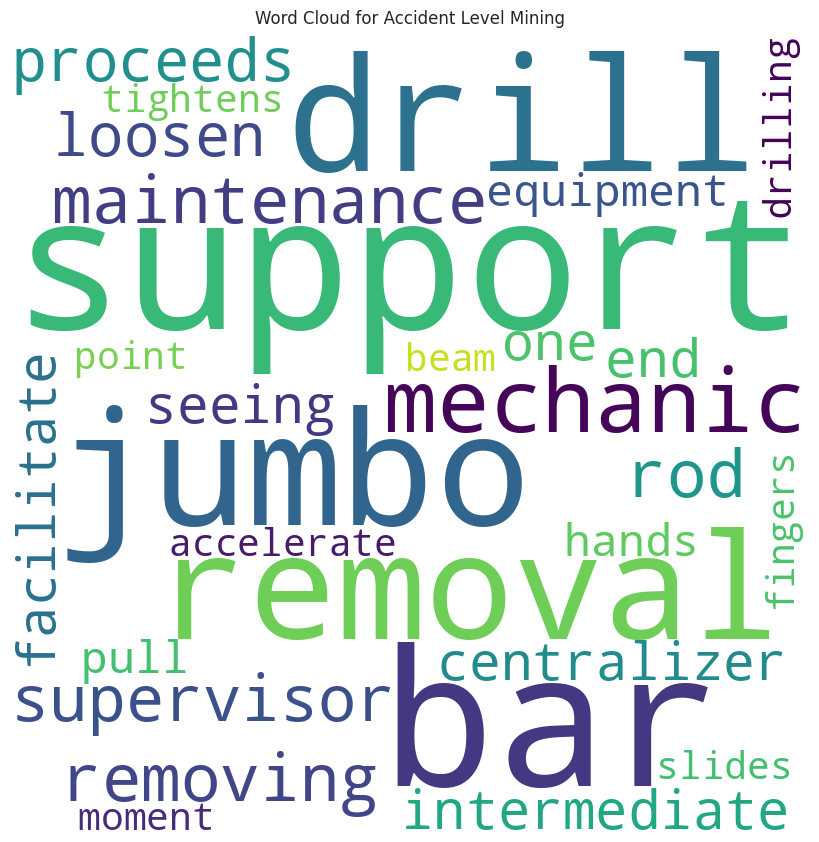

support: 1.0000
bar: 1.0000
drill: 0.6667
jumbo: 0.6667
removal: 0.6667
mechanic: 0.6667
removing: 0.3333
rod: 0.3333
maintenance: 0.3333
supervisor: 0.3333
support,bar,drill,jumbo,removal,mechanic,removing,rod,maintenance,supervisor


In [138]:
print(get_cloud_for_level(df_1,"Description", "Industry_Sector","Mining"))

In [136]:
top_keywords = sorted(wordCloud.words_.items(), key=lambda x: x[1], reverse=True)[:10]
top_keywords[0][0]
print(",".join (word for word, freq in top_keywords) )

support,bar,drill,jumbo,removal,mechanic,removing,rod,maintenance,supervisor


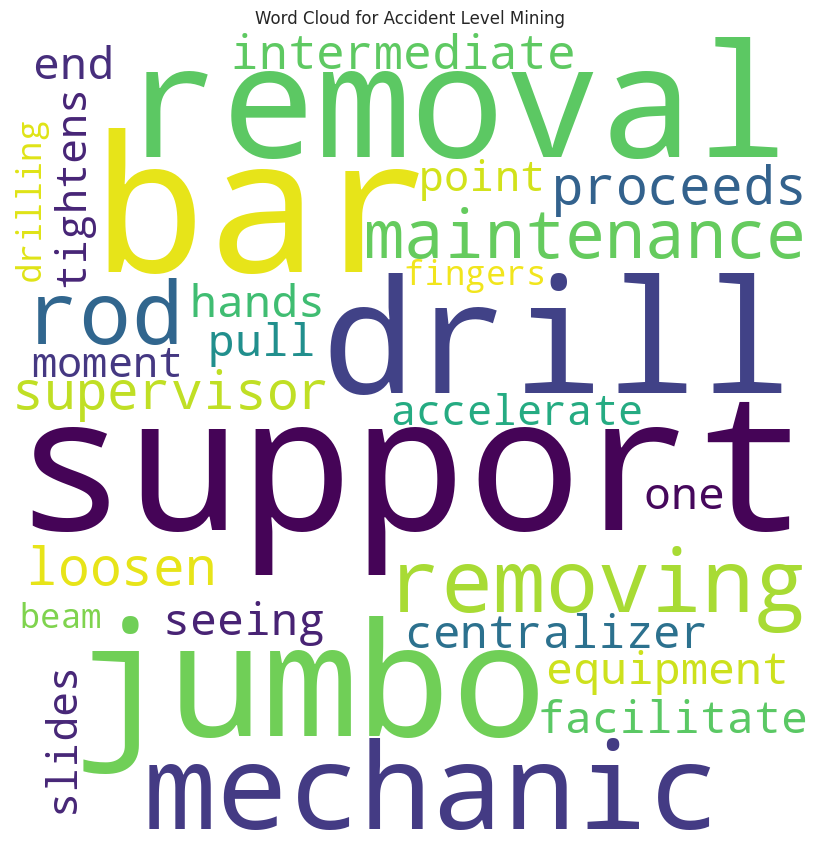

support: 1.0000
bar: 1.0000
drill: 0.6667
jumbo: 0.6667
removal: 0.6667
mechanic: 0.6667
removing: 0.3333
rod: 0.3333
maintenance: 0.3333
supervisor: 0.3333


TypeError: sequence item 0: expected str instance, tuple found

In [115]:
frequent_keywords_per_industry.append(['Mining',get_cloud_for_level(df_1,"Description", "Industry_Sector","Mining")])

In [ ]:
frequent_keywords_per_industry.append(['Metals',get_cloud_for_level(df_NLP,"Description", "Industry_Sector","Metals")])

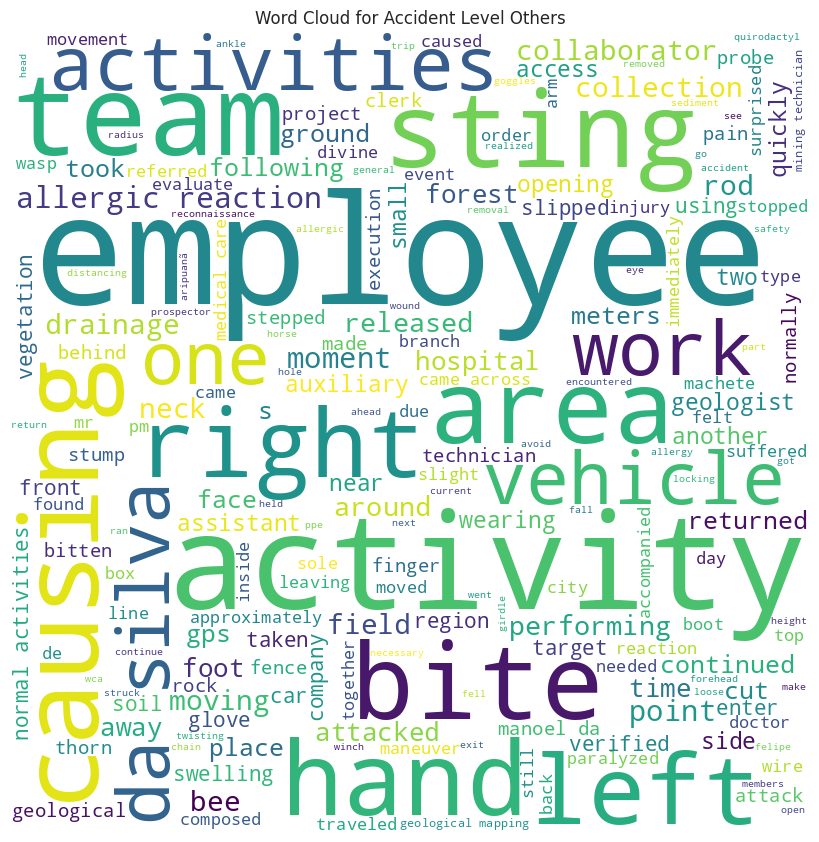

In [92]:
frequent_keywords_per_industry.append(['Others',get_cloud_for_level(df_NLP,"Description", "Industry_Sector","Others")])

#### Combine all features into a Sentence
Let us combine the other features into Sentence in a new column. This column will later be prefixed to the `Description` column to give more context.

In [ ]:
# Form a combined string with other columns and prefix it into the Description column
df_combinedDesc_orig = df_processed.copy()

# Update Employee_Type values
df_combinedDesc_orig['Employee_Type'] = df_combinedDesc_orig['Employee_Type'].replace({
    'Third Party': 'Contractor',
    'Third Party (Remote)': 'Remote Contractor'
})

df_combinedDesc_orig['Location'] = df_combinedDesc_orig['Location'].replace({
    'Local_01': 'one',
    'Local_02': 'two',
    'Local_03': 'three',
    'Local_04': 'four',
    'Local_05': 'five',
    'Local_06': 'six',
    'Local_07': 'seven',
    'Local_08': 'eight',
    'Local_09': 'nine',
    'Local_10': 'ten',
    'Local_11': 'eleven',
    'Local_12': 'twelve'
})

df_combinedDesc_orig['Combined_Features_Text'] = (
    'This incident happened in the ' + df_combinedDesc_orig['Industry_Sector'] + ' industry, in location '
    + df_combinedDesc_orig['Location'] + ', on a ' + df_combinedDesc_orig['Weekday'] + ' in the month of ' + df_combinedDesc_orig['Month']
    + ', with a ' + df_combinedDesc_orig['Gender'] + ' person who is a ' + df_combinedDesc_orig['Employee_Type'] + ' in the company.'
    + ' The risk was caused by ' + df_combinedDesc_orig['Critical_Risk'] + '. The detailed description is as follows: '
)

# Drop all columns except Description and Combined_Description
df_combinedDesc_orig.drop(columns=['Country', 'Location', 'Industry_Sector', 'Gender', 'Employee_Type', 'Critical_Risk', 'Month', 'Weekday'], inplace=True)
df_combinedDesc_orig.sample(3)

df_combinedDesc_orig.sample(3)

KeyError: 'Employee_Type'

#### Split the data into training, validation and testing

In [ ]:
# Split the dataframe in X and Y
X = df_combinedDesc_orig.drop(columns=[targetColumn])
y = df_combinedDesc_orig[targetColumn]

In [ ]:
# Split the data into train, validation and test sets ensuring we have representative samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Print the shape of the train, validation and test sets
print(f'Train set: {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Validation set: {X_val.shape[0]} rows and {X_val.shape[1]} columns')
print(f'Test set: {X_test.shape[0]} rows and {X_test.shape[1]} columns')

Train set: 267 rows and 2 columns
Validation set: 67 rows and 2 columns
Test set: 84 rows and 2 columns


#### Data augmentation for minority categories

In [ ]:
# Distribution of the target variable
df_combinedDesc_orig[targetColumn].value_counts(normalize=True)

Potential_Accident_Level
3    0.337321
2    0.253589
1    0.227273
0    0.107656
4    0.074163
Name: proportion, dtype: float64

Let us augment the data for the levels 0 and 4. We would create synthetic data for training.

In [ ]:
df_combinedDesc_level4 = df_combinedDesc_orig[df_combinedDesc_orig[targetColumn] == 4]
df_combinedDesc_level4.sample(3)

Description  \
346                                                                                                                                                                 When the scoop was heading from Rpa 910 to the cut-off point of the Cro 861 South to be unloaded, it visualizes a truck that was parked with the lights and the engine ignited inside the thrust - where the Scoop found accumulating dismount-; the operator stops the Scoop and gets off to tell the driver of the truck to leave and when he finds no one he decides to go and look for the driver at the top of Cro 861 South, where he can not find it; Then he returns to his Scoop and at 15 to 20 meters visualizes the light of a lamp shining in the direction of the gable, when approaching, he finds the deceased lying on the side of the Scoop and proceeds to give immediate notice to the supervisory of the shift, control center and emergency center.   
383  When performing shotcrete casting for resane on Cruise 791 Nv. 1940 at 02:50 p.m. approximately, the operator was placed on the left side of the equipment and started the release of 02 cubic meters, at that time decided to paralyze the task for a few minutes due to a leak of water in the roof box that did not allow the adhesion of the shotcrete to the rock (setting). When restarting the shotcrete launch the operator that was on the left side moved to the right side of the equipment, while the assistant and the operator mixkret to see that there was no pumping went to verify what happened and when they returned they realized that the operator was not, so they assume that he had fallen down the chimney, they left the job to ask for help immediately. The emergency response brigade and the medical service are activated, who verify the death of the collaborator. The accident investigation begins.   
52                                                                                     In circumstances that two workers of the company INCIMMET fectuaban the loading of explosives using an equipment anfoloader, in a front of the work - sustained with shotcreterepentinamente of the right superior part of the crown, a piece of rock of approx. 9. kg, (0.2mx0.15mx0.10m), impacting on the basket and on the back of the helper who was in the basket suspended at 2.2 m height, moments later a block of rock is detached from the wall of the gable approx. 1,500 kg. (1.20mx1.10mx0.40m), which impacts the ampoloader team and part of this block injures the operator of the ampoloader team who was standing on the ground. The equipment anfoloader has a cabin with protection ROPs and FOPs, at the time of the accident both workers used helmets and safety boots. Both suffered polyontusions and minor scoria injuries.   

     Potential_Accident_Level  \
346                         4   
383                         4   
52                          4   

                                                                                                                                                                                                                                          Combined_Features_Text  
346  This incident happened in the Mining industry, in location one, on a Wednesday in the month of March, with a Male person who is a Contractor in the company. The risk was caused by Vehicles and Mobile Equipment. The detailed description is as follows:   
383                            This incident happened in the Mining industry, in location four, on a Wednesday in the month of May, with a Male person who is a Contractor in the company. The risk was caused by Fall. The detailed description is as follows:   
52                           This incident happened in the Mining industry, in location three, on a Friday in the month of March, with a Male person who is a Contractor in the company. The risk was caused by Others. The detailed description is as follows:

In [ ]:
df_combinedDesc_level4.shape

(31, 3)

##### Synonym replacement

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import random
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rbhattacharya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rbhattacharya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rbhattacharya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rbhattacharya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Function to get synonyms for a word with caching. This would improve performance.
synonym_cache = {}

# Function to get synonyms for a word
def get_synonyms(word):
    if word in synonym_cache:
        return synonym_cache[word]

    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ')
            if synonym.lower() != word.lower():
                synonyms.add(synonym)

    synonym_cache[word] = list(synonyms)
    return synonym_cache[word]

# Function to replace words in a sentence with their synonyms
def fn_synonym_replacement(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    new_words = words.copy()

    for i, (word, tag) in enumerate(tagged_words):
        """
        Ignore words in uppercase or containing numbers or starting with uppercase in middle of a sentence.
        This would help to preserve names, acronyms and other proper nouns.
        """
        if word.isupper() or any(char.isdigit() for char in word) or (word[0].isupper() and i != 0):
            continue

        # Ignore punctuation
        if word in string.punctuation:
            continue

        synonyms = get_synonyms(word)
        if synonyms:
            synonym = random.choice(synonyms)
            if synonym.lower() != word.lower():
                # Preserve the original capitalization
                if word[0].isupper():
                    synonym = synonym.capitalize()
                new_words[i] = synonym

    return ' '.join(new_words)


In [ ]:
# Example usage
sentence = "In moments that the operator of the Jumbo 2, tried energize your equipment to proceed to the installation of 4 split set at intersection 544 of Nv 3300, remove the lock and opening the electric board of 440V and 400A, and when lifting the thermomagnetic key This makes phase to ground - phase contact with the panel shell - producing a flash which reaches the operator causing the injury described."
augmented_sentence = fn_synonym_replacement(sentence)
print(f'Original Sentence: {sentence}')
print(f'Augmented Sentence: {augmented_sentence}')

Original Sentence: In moments that the operator of the Jumbo 2, tried energize your equipment to proceed to the installation of 4 split set at intersection 544 of Nv 3300, remove the lock and opening the electric board of 440V and 400A, and when lifting the thermomagnetic key This makes phase to ground - phase contact with the panel shell - producing a flash which reaches the operator causing the injury described.
Augmented Sentence: Inward import that the wheeler dealer of the Jumbo 2 , strain stimulate your equipment to go to the induction of 4 part situated atomic number 85 overlap 544 of Nv 3300 , murder the mesh and give the galvanic plug-in of 440V and 400A , and when airlift the thermomagnetic samara This constitute phase angle to establish - form reach with the jury casing - create amp newsbreak which hand the wheeler dealer make the wound discover .


In [ ]:
# Function to augment data for the specified column
def augment_dataframe(df, columnToAugment, augmentation_function, n_augmentations=1, i=1):
    augmented_data = []
    for _, row in df.iterrows():
        original_sentence = row[columnToAugment]
        for _ in range(n_augmentations):
            augmented_sentence = augmentation_function(original_sentence)
            augmented_row = row.copy()
            # augmented_row[columnToAugment] = augmented_sentence
            augmented_row[f'Augmented_Description_{i}'] = augmented_sentence
            augmented_row['is_augmented'] = 'Y'
            augmented_data.append(augmented_row)

    # Create a DataFrame with the augmented data
    df_augmented = pd.DataFrame(augmented_data)

    # Add the original data with is_augmented column set to 'N'
    df['is_augmented'] = 'N'

    # Combine the original and augmented data
    df_combined = pd.concat([df, df_augmented], ignore_index=True)

    return df_combined

In [ ]:
df_combinedDesc_level4.shape

(31, 3)

In [ ]:
df_temp = df_combinedDesc_level4.copy()
# Number of augmentations per row
n_augmentations = 3

# Combine into a single function call
df_combined = augment_dataframe(df_temp, 'Description', fn_synonym_replacement, n_augmentations)

print(f'Original Data: {df_temp.shape}')
print(f'Augmented Data: {df_combined.shape}')

Original Data: (31, 4)
Augmented Data: (124, 5)


In [ ]:
df_combined.sample(3)

Description  \
90                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      In the Nv. 3370, CX 212 - South, when the Mechanic loosens a through bolt of the intermediate cardan protector of the Dumper 01, the protector is released and imprisons the first finger of the left hand against the connector of the hydraulic steering cylinder (Position 2) .   
48  In circumstances that two workers of the company INCIMMET fectuaban the loading of explosives using an equipment anfoloader, in a front of the work - sustained with shotcreterepentinamente of the right superior part of the crown, a piece of rock of approx. 9. kg, (0.2mx0.15mx0.10m), impacting on the basket and on the back of the helper who was in the basket suspended at 2.2 m height, moments later a block of rock is detached from the wall of the gable approx. 1,500 kg. (1.20mx1.10mx0.40m), which impacts the ampoloader team and part of this block injures the operator of the ampoloader team who was standing on the ground. The equipment anfoloader has a cabin with protection ROPs and FOPs, at the time of the accident both workers used helmets and safety boots. Both suffered polyontusions and minor scoria injuries.   
60                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          When checking voltage at the power outlet of the the plug and socket to make sure the connection was correct, when there was a small electrical arc in the power cord, causing a slight burn in the right hand wrist. The protection system acted immediately.   

    Potential_Accident_Level  \
90                         4   
48                         4   
60                         4   

                                                                                                                                                                                                                      Combined_Features_Text  \
90  This incident happened in the Mining industry, in location three, on a Tuesday in the month of February, with a Male person who is a Contractor in the company. The risk was caused by Pressed. The detailed description is as follows:    
48       This incident happened in the Mining industry, in location three, on a Friday in the month of March, with a Male person who is a Contractor in the company. The risk was caused by Others. The detailed description is as follows:    
60             This incident happened in the Mining industry, in location two, on a Friday in the month of May, with a Male person who is a Employee in the company. The risk was caused by Others. The detailed description is as follows:    

   is_augmented  \
90            Y   
48            Y   
60            Y   

                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# !pip install nlpaug

In [ ]:
from nlpaug.augmenter.word import SynonymAug

In [ ]:
def nlpaug_synonym_replacement(sentence):
    aug = SynonymAug(aug_src='wordnet')
    augmented_text = aug.augment(sentence)
    return augmented_text

In [ ]:
# Example usage
sentence = "In moments that the operator of the Jumbo 2, tried energize your equipment to proceed to the installation of 4 split set at intersection 544 of Nv 3300, remove the lock and opening the electric board of 440V and 400A, and when lifting the thermomagnetic key This makes phase to ground - phase contact with the panel shell - producing a flash which reaches the operator causing the injury described."
augmented_sentence = nlpaug_synonym_replacement(sentence)
print(f'Original Sentence: {sentence}')
print(f'Augmented Sentence: {augmented_sentence}')

Original Sentence: In moments that the operator of the Jumbo 2, tried energize your equipment to proceed to the installation of 4 split set at intersection 544 of Nv 3300, remove the lock and opening the electric board of 440V and 400A, and when lifting the thermomagnetic key This makes phase to ground - phase contact with the panel shell - producing a flash which reaches the operator causing the injury described.
Augmented Sentence: ['In moments that the operator of the Jumbo 2, tried arouse your equipment to proceed to the installation of 4 snag set at intersection point 544 of Nv 3300, remove the lock and opening the electric control board of 440V and 400A, and when lifting the thermomagnetic key This makes phase to ground - phase link with the panel shell - producing a flash which turn over the operator causing the combat injury described.']


In [ ]:
df_temp = df_combined.copy()
# Number of augmentations per row
n_augmentations = 3

# Combine into a single function call
df_combined = augment_dataframe(df_temp, 'Description', nlpaug_synonym_replacement, n_augmentations)

print(f'Original Data: {df_temp.shape}')
print(f'Augmented Data: {df_combined.shape}')

####

#### Cleaning the Description column

From visual analysis, following are the observations from the `Description` column:
- Presence of numbers.
- Presence of person and company names
- Duplicate descriptions corresponding to same Potential_Accident_Level but having other features different.
- Presence of special characters - degree sign, colon, hyphen, bracket, quotes, etc.
- Incorrect spellings of few words.
- All in English language.

Steps for Data Preprocessing:
1. Stop words removal
2. Remove Special Characters
3. Removing unwanted spaces
4. Remove Numbers (as in this numbers do not add any contextual value)
5. Remove case sensitiveness (will convert to lower case)
6. USe Lemmentization to bring words to their base form
7. Create Local Synonumn Library (specific for Mining and metal industry)
8. Add POS Tagging
9. SPell Checker

### Functions to create the pipeline

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    cleaned_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return cleaned_text


In [ ]:
def apply_SpellChecker(text):

    """Corrects spelling errors in a given text.

    Args:
        text (str): The text to correct.

    Returns:
        str: The corrected text.
    """

    spell = SpellChecker()

    words = text.split()
    corrected_text = []

    for word in words:
        corrected_word = spell.correction(word)
        corrected_text.append(corrected_word)
        #print(corrected_word)

    #return " ".join(corrected_text if corrected_text is not None)
    return " ".join(str(item) for item in corrected_text if item is not None)


In [ ]:
#df_proc_3["Description"].apply()
#df_proc_3["Description"].head(5)
print(apply_SpellChecker("Teting for spel checker"))

testing for spell checker


In [ ]:
# defining a function to perform lemmentization
def apply_lemmentization(text):
    """Lemmatizes a given text.

    Args:
        text (str): The text to lemmatize.

    Returns:
        str: The lemmatized text.
    """

    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]

    return " ".join(str(item) for item in lemmatized_words)

In [ ]:
print(apply_lemmentization('I am walking to the door'))

I be walk to the door


In [ ]:
# Function to convert the text to lowercase
def convert_to_lower(text):
    return text.lower()

In [ ]:
df_proc_4 = df_proc_3.copy()
df_proc_4['Cleaned_text'] = df_proc_4['Description'].apply(convert_to_lower)

print(df_proc_4['Description'][71])

being approximately 14:25 h when supervising the line clamping of the pom d071 roy canario returning to the thickener d1304 hits his nose with the metal chute out of operation.


In [ ]:
def remove_extra_spaces(text):
  # removing extra whitespaces from the text
  return text.str.strip()

We observe quite a few mentions of time in various formats. e.g. "9:45 am", "14:16", "04:50 p.m.", etc. Let us replace all these with period of the day - morning, afternoon, evening or night.

In [ ]:
import re

def get_time_period(time_str):
        # Convert 12-hour and 24-hour times to period
        try:
            # Handle 12-hour format with AM/PM
            if 'a.m.' in time_str.lower() or 'am' in time_str.lower():
                hour = int(re.findall(r'\d+', time_str)[0])
                if 5 <= hour < 12:
                    return 'morning'
                elif hour == 12:
                    return 'noon'
                else:
                    return 'early morning'

            # Handle 12-hour format with P.M.
            if 'p.m.' in time_str.lower() or 'pm' in time_str.lower():
                hour = int(re.findall(r'\d+', time_str)[0])
                if hour < 5:
                    return 'afternoon'
                elif 5 <= hour < 8:
                    return 'evening'
                else:
                    return 'night'

            # Handle 24-hour format
            hour = int(time_str.split(':')[0])
            if 5 <= hour < 12:
                return 'morning'
            elif 12 <= hour < 17:
                return 'afternoon'
            elif 17 <= hour < 20:
                return 'evening'
            else:
                return 'night'

        except (IndexError, ValueError):
            return time_str

# Function to convert numeric times to time periods (morning, afternoon, evening, night)
def convert_time_to_period(text):
    # Regex patterns for different time formats
    patterns = [
        r'\d{1,2}:\d{2}\s*(?:a\.m\.|am)',
        r'\d{1,2}:\d{2}\s*(?:p\.m\.|pm)',
        r'\d{1,2}:\d{2}'
    ]

    # Replace times with periods
    for pattern in patterns:
        text = re.sub(pattern,
                      lambda m: get_time_period(m.group(0)),
                      text,
                      flags=re.IGNORECASE)

    return text

In [ ]:
# to use regular expressions for manipulating text data
import re
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match alphanumeric characters (numbers also need to be removed)
    pattern = '[^A-Za-z]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:

df_proc_5 = df_proc_4.copy()
df_proc_5['Description'] = df_proc_5['Description'].apply(convert_time_to_period)

print(df_proc_4['Description'][71], df_proc_5['Description'][71])

being approximately 14:25 h when supervising the line clamping of the pom d071 roy canario returning to the thickener d1304 hits his nose with the metal chute out of operation. being approximately afternoon h when supervising the line clamping of the pom d071 roy canario returning to the thickener d1304 hits his nose with the metal chute out of operation.


The description contains names of person and places. Let us use a pretrained model from Hugging Face to extract and replace the named entities from the text.

In [ ]:
# Load the pre-trained NER model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Check if GPU is available and set the device
device = 0 if torch.cuda.is_available() else -1

model_name = "dslim/distilbert-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

In [ ]:
# Function to detect and replace names
def detect_replace_names(text):
    # Load the NER pipeline
    ner = pipeline('ner', model=model, tokenizer=tokenizer, device=device)

    # Detect names in the text
    entities = ner(text)

    # Replace names with string 'NAME'
    for entity in entities:
        if entity['entity'] == 'I-PER' or entity['entity'] == 'B-PER':
            text = text.replace(entity['word'], '[NAME]')
        elif entity['entity'] == 'I-ORG' or entity['entity'] == 'B-ORG':
            text = text.replace(entity['word'], '[ORGANIZATION]')
        elif entity['entity'] == 'I-LOC' or entity['entity'] == 'B-LOC':
            text = text.replace(entity['word'], '[LOCATION]')
        elif entity['entity'] == 'I-MISC' or entity['entity'] == 'B-MISC':
            text = text.replace(entity['word'], '[MISC]')

    return text

In [ ]:
df_proc_6 = df_proc_5.copy()


In [ ]:
#df_proc_6 = df_proc_5.copy()
df_proc_6['Description'] = df_proc_6['Description'].apply(detect_replace_names)

print(df_proc_5['Description'][3])

Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set 

being morning. approximately in the nv. 1880 cx-695 ob7, the personnel begins the task of unlocking the soquet bolts of the bhb machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding mr. cristóbal - auxiliary assistant to climb to the platform to exert pressure with your hand on the "dado" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.


In [ ]:
# Combined text processing pipeline function
def text_processing_pipeline(text):
    text = detect_replace_names(text)
    text = convert_to_lower(text)
    text = convert_time_to_period(text)
    text = remove_special_characters(text)
    text = apply_SpellChecker(text)
    text= remove_stopwords(text)
    text = apply_lemmentization(text)


    return text

In [ ]:
df_proc_4 = df_proc_3.copy()
df_proc_4['Org_Description']=df_proc_4['Description']
df_proc_4['Description'] = df_proc_4['Description'].apply(text_processing_pipeline)

Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set 

In [ ]:
df_proc_4[['Org_Description','Description']].head(3)

Org_Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   
2                                                                                                                                                 In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.   

                                                                                                                                                                                                                                                                          Description  
0  remove drill rod miss mob miss maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo  
1                                                                                 activation sodium sulfide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulfide solution grams liter  
2                                                                                  sub station organization lo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area leave foot collaborator cause injury

## **Create Word Embeddings**

### Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

In [ ]:
df_final.to_csv("/content/drive/MyDrive/Data/GLCapstone_NLPChatBOT_CleanedData.csv", index=False)

### Reload the data from the file

In [ ]:
# load data from the file
data = pd.read_csv("/content/drive/MyDrive/Data/GLCapstone_NLPChatBOT_CleanedData.csv")

### Using Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in data['Description'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2155


In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Word2Vec_vec = pd.DataFrame(data['Description'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Features '+str(i) for i in range(vec_size)])
df_Word2Vec_vec

Features 0  Features 1  Features 2  Features 3  Features 4  Features 5  \
0      0.000353    0.063209    0.008567    0.024792    0.014564   -0.064320   
1     -0.000141    0.027628    0.004116    0.010875    0.006149   -0.028371   
2      0.000260    0.064994    0.008605    0.025060    0.014929   -0.066834   
3      0.000432    0.069083    0.009490    0.028203    0.015373   -0.072312   
4      0.000536    0.067982    0.008797    0.027041    0.016165   -0.070278   
..          ...         ...         ...         ...         ...         ...   
413   -0.000275    0.075364    0.010011    0.029878    0.016920   -0.077191   
414    0.000243    0.063184    0.007666    0.024545    0.014066   -0.065404   
415    0.000668    0.057181    0.007815    0.022751    0.013916   -0.059291   
416    0.000528    0.080551    0.010335    0.031811    0.018121   -0.083396   
417    0.000159    0.050881    0.006784    0.020043    0.012019   -0.051495   

     Features 6  Features 7  Features 8  Features 9  ...  Features 290  \
0      0.043989    0.121626    0.009858   -0.013295  ...      0.000655   
1      0.019810    0.054136    0.004649   -0.005702  ...      0.000416   
2      0.045243    0.125726    0.009751   -0.013489  ...      0.001719   
3      0.049194    0.134418    0.011241   -0.014302  ...      0.000702   
4      0.047227    0.131787    0.010149   -0.014611  ...      0.000707   
..          ...         ...         ...         ...  ...           ...   
413    0.052172    0.145485    0.012452   -0.015407  ...      0.001393   
414    0.044197    0.122069    0.009573   -0.013560  ...      0.002257   
415    0.039744    0.112199    0.009565   -0.010687  ...      0.001000   
416    0.055150    0.154804    0.012639   -0.015452  ...      0.001805   
417    0.035428    0.097751    0.008459   -0.010790  ...      0.000534   

     Features 291  Features 292  Features 293  Features 294  Features 295  \
0        0.063222      0.037668     -0.008041      0.053348      0.079320   
1        0.028374      0.016383     -0.003914      0.023463      0.036374   
2        0.065433      0.038035     -0.009069      0.054993      0.081123   
3        0.070761      0.041431     -0.010392      0.059154      0.087970   
4        0.069225      0.040128     -0.009494      0.058444      0.085572   
..            ...           ...           ...           ...           ...   
413      0.076628      0.043647     -0.010947      0.064190      0.094524   
414      0.064058      0.036941     -0.007854      0.053894      0.078984   
415      0.058129      0.034826     -0.008180      0.049300      0.073198   
416      0.081176      0.047491     -0.010839      0.067881      0.100520   
417      0.051098      0.028481     -0.006860      0.042685      0.062834   

     Features 296  Features 297  Features 298  Features 299  
0       -0.009626     -0.031294      0.024603      0.000188  
1       -0.003960     -0.014046      0.011372      0.000405  
2       -0.009960     -0.033053      0.025968     -0.000634  
3       -0.009791     -0.034744      0.028726     -0.000487  
4       -0.009929     -0.033678      0.026636     -0.000428  
..            ...           ...           ...           ...  
413     -0.011435     -0.037805      0.030421      0.000171  
414     -0.009245     -0.031604      0.024575     -0.000121  
415     -0.008582     -0.027754      0.023033      0.000356  
416     -0.011517     -0.040130      0.031706     -0.000222  
417     -0.007078     -0.025156      0.019792     -0.000551  

[418 rows x 300 columns]

### Using GloVe

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/Data/glove.6B.100d.txt.word2vec.txt'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)
vec_size=100

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
glove_words = glove_model.index_to_key
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
glove_word_vector_dict

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [ ]:
def average_vectorizer_GloVe(doc):
    """
      Purpose:
          Transforms a document (string of words) into a fixed-size numerical vector by:
  		      Finding the GloVe vector representation for each word in the document.
	  	      Averaging these vectors to create a single feature vector representing the entire document.

      Args:
         doc (str): A string containing the document/sentence to be vectorized.
      Returns:
        str:  Return the Feature Vector (The resulting vector represents the average semantic embedding of the document).
    """

    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Glove_vec = pd.DataFrame(data['Description'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove_vec

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0    -0.118640   0.028627  -0.045399  -0.159348  -0.114698  -0.190317   
1    -0.254342   0.210341   0.046873   0.101919  -0.052349   0.015897   
2    -0.095405   0.072565   0.008443  -0.230076   0.028165  -0.168493   
3    -0.085608   0.019334   0.156949  -0.204292  -0.037374   0.162142   
4    -0.066011  -0.002596   0.158993  -0.036191  -0.123470   0.006349   
..         ...        ...        ...        ...        ...        ...   
413  -0.074938   0.130205  -0.015690  -0.083147  -0.049789   0.121995   
414  -0.010367   0.025985   0.020778  -0.212047  -0.125576  -0.089335   
415  -0.194498   0.070322   0.206584  -0.231992  -0.187947   0.234593   
416  -0.349307   0.119944  -0.025077  -0.186436   0.081846   0.031161   
417  -0.163491   0.154662   0.252439  -0.231148  -0.117668   0.192363   

     Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 90  Feature 91  \
0    -0.214894   0.301011  -0.015847   0.176505  ...   -0.134942    0.101842   
1    -0.027432   0.228189   0.143179   0.123685  ...    0.075108   -0.026158   
2     0.025562   0.069160   0.044386   0.172968  ...   -0.124909   -0.000120   
3    -0.133859   0.031437  -0.090122   0.034992  ...   -0.197416    0.118325   
4    -0.061645   0.118685  -0.103058   0.187120  ...   -0.120214   -0.046071   
..         ...        ...        ...        ...  ...         ...         ...   
413  -0.024570   0.244198  -0.181569   0.150326  ...   -0.108067    0.007008   
414  -0.169057   0.061459   0.257027   0.210347  ...   -0.061296    0.010906   
415  -0.169832   0.231429  -0.074834  -0.008142  ...   -0.030126   -0.036869   
416  -0.128498   0.257928  -0.020740   0.110585  ...   -0.095770    0.158223   
417  -0.089140   0.313521  -0.019908   0.038258  ...    0.076415   -0.009728   

     Feature 92  Feature 93  Feature 94  Feature 95  Feature 96  Feature 97  \
0     -0.132571    0.102788   -0.002578   -0.133695    0.073456   -0.181630   
1     -0.182211   -0.014640   -0.213737    0.005833    0.128447   -0.267272   
2      0.017937    0.058952   -0.145230    0.104775   -0.113387   -0.190954   
3      0.070447    0.135596   -0.163948   -0.108741   -0.168154   -0.181802   
4     -0.041326    0.117393   -0.181130   -0.007732   -0.029887   -0.284014   
..          ...         ...         ...         ...         ...         ...   
413    0.023036    0.023395   -0.130381   -0.133435    0.013435   -0.094808   
414    0.140214    0.077737   -0.128300   -0.016110    0.040745   -0.204993   
415    0.006828   -0.111432   -0.155727    0.125633    0.000627   -0.011891   
416   -0.025648   -0.175363   -0.227514    0.000060    0.046897   -0.086193   
417    0.215673    0.253379   -0.151616    0.058094    0.147052    0.035290   

     Feature 98  Feature 99  
0      0.379611    0.053361  
1      0.230634   -0.139557  
2      0.460572   -0.178070  
3      0.463619    0.054735  
4      0.624362   -0.087428  
..          ...         ...  
413    0.636570   -0.046063  
414    0.424256   -0.123027  
415    0.561959    0.036243  
416    0.485862   -0.031718  
417    0.416238   -0.024645  

[418 rows x 100 columns]

### Using Transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model_transformer = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
embedding_matrix = model_transformer.encode(data['Description'] ,device=device, show_progress_bar=True)

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(418, 384)

In [ ]:
df_transformers_vec = pd.DataFrame(embedding_matrix, columns=['Features '+str(i) for i in range(384)])

Tranformer embeddings of vector size 384 have been generated

##  **Design train and test basic machine learning classifiers**

In [ ]:
#to hold the metrics for each model
ListMetrics =[]

In [ ]:
# Function to print confusion matrix as a dataframe
def print_confusion_matrix(model, actual, predicted):
    cm = confusion_matrix(actual, predicted)
    cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
    return cm_df

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['I','||', '|||', 'IV','V']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
def pred_plot_confusion_matrix(name,model, x_train, x_test, y_train, y_test):
    print("For Train Data")
    y_train_pred = model.predict(x_train)
    plot_confusion_matrix (y_train,y_train_pred)

    print("For Test Data")
    y_test_pred = model.predict(x_test)
    plot_confusion_matrix (y_test,y_test_pred)
    print("-"*50)
    print("Classification Report for Train Data")
    print(classification_report(y_train,y_train_pred))
    print("-"*50)
    print("Classification Report for Test Data")
    print(classification_report(y_test,y_test_pred))
    acurracy_train=accuracy_score(y_train,y_train_pred)
    acurracy_test = accuracy_score(y_test,y_test_pred)
    print(f"""Accuracy on training data : { acurracy_train}""" )
    print(f"""Accuracy on test data : { acurracy_test}""" )
    print("-"*100)
    ListMetrics.append([name,acurracy_train, acurracy_test])

### Train Base RandomForestClassifier model

In [ ]:
# Design and train a Random Forest Classifier model. use Weighted F1-Score as the primary metric while monitoring the confusion matrix for critical misclassifications
base_rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=15,
    max_features='auto',
    n_jobs=-1
)

In [ ]:
%%time

# Train the model
base_rf_model.fit(X_train_resampled, y_train_resampled)

CPU times: total: 1.03 s
Wall time: 1.07 s


RandomForestClassifier(max_depth=15, max_features='auto', n_jobs=-1,
                       random_state=42)

In [ ]:
# Make predictions
y_train_pred = base_rf_model.predict(X_train_resampled)
y_val_pred = base_rf_model.predict(X_val)

In [ ]:
# Print the classification report
print('Classification Report for Validation Data')
print(classification_report(y_val, y_val_pred))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        50
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5
           3       0.33      0.20      0.25         5
           4       0.00      0.00      0.00         1

    accuracy                           0.61        67
   macro avg       0.21      0.20      0.20        67
weighted avg       0.56      0.61      0.58        67



In [ ]:
# Print the confusion matrix
print_confusion_matrix(base_rf_model, y_val, y_val_pred)

0  1  2  3  4
0  40  4  4  2  0
1   6  0  0  0  0
2   5  0  0  0  0
3   4  0  0  1  0
4   1  0  0  0  0

In [ ]:
# Print the weighted F1-Score
f1_score_val = f1_score(y_val, y_val_pred, average='weighted')
print(f'Weighted F1-Score: {f1_score_val:.2f}')

Weighted F1-Score: 0.58


In [ ]:
# Print the feature importances
feature_importances = base_rf_model.feature_importances_
features = X_train_resampled.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print('Feature Importances in the order of importance')
feature_importance_df

Feature Importances in the order of importance


Feature  Importance
9                     Month_Num_cos    0.165014
10                  Weekday_Num_sin    0.161592
8                     Month_Num_sin    0.159862
0                     Location_freq    0.152570
11                  Weekday_Num_cos    0.127467
2            Industry_Sector_Mining    0.053243
4          Employee_Type_Contractor    0.041923
6            Employee_Type_Employee    0.041534
1            Industry_Sector_Metals    0.036919
5   Employee_Type_Contractor_Remote    0.036205
3            Industry_Sector_Others    0.018845
7                     Gender_binary    0.004826

#### Fine tuning the model

In [ ]:
# For hypertuning taking the top 10 features based on importance
top_features = feature_importance_df['Feature'].head(10).values

# Create a new dataframe with the top 10 features
X_train_resampled_top = X_train_resampled[top_features]
X_val_top = X_val[top_features]

In [ ]:
# Perform hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

In [ ]:
# Define hyperparameter search space
param_distributions = {
    'n_estimators': [50, 100, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Set up RandomizedSearchCV
random_search_st = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    scoring=f1_scorer,
    random_state=42,
    verbose=2,
    n_jobs=-1,  # Use all available cores
)

# Perform hyperparameter tuning
random_search_st.fit(X_train_resampled_top, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search_st.best_params_)
print("Best Cross-Validation Score:", random_search_st.best_score_)

best_model_st = random_search_st.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validation Score: 0.7770092312865406


In [ ]:
# Predicting on validation data
y_val_pred_st = best_model_st.predict(X_val_top)

In [ ]:
# Print the classification report
print('Classification Report for Validation Data')
print(classification_report(y_val, y_val_pred_st))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        50
           1       0.14      0.17      0.15         6
           2       0.00      0.00      0.00         5
           3       0.20      0.20      0.20         5
           4       0.00      0.00      0.00         1

    accuracy                           0.61        67
   macro avg       0.22      0.23      0.22        67
weighted avg       0.59      0.61      0.60        67



In [ ]:
cm_df = print_confusion_matrix(best_model_st, y_val, y_val_pred_st)
cm_df

0  1  2  3  4
0  39  6  3  2  0
1   4  1  0  1  0
2   5  0  0  0  0
3   4  0  0  1  0
4   0  0  0  1  0

In [ ]:
# Print the weighted F1-Score
f1_score_val = f1_score(y_val, y_val_pred_st, average='weighted')
print(f'Weighted F1-Score: {f1_score_val:.2f}')

Weighted F1-Score: 0.60


In [ ]:
%%time

# Perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_st = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_distributions,
    cv=5,  # 5-fold cross-validation
    scoring=f1_scorer,
    verbose=2,
    n_jobs=-1,  # Use all available cores
)

# Perform hyperparameter tuning
grid_search_st.fit(X_train_resampled_top, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_st.best_params_)
print("Best Cross-Validation Score:", grid_search_st.best_score_)

best_model_st = grid_search_st.best_estimator_

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
Best Hyperparameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.7790233409235072
CPU times: total: 51 s
Wall time: 50min 34s


In [ ]:
best_model_grid_search = grid_search_st.best_estimator_

In [ ]:
# Predicting on validation data
y_val_pred = best_model_grid_search.predict(X_val_top)

In [ ]:
# Print the classification report
print('Classification Report for Validation Data')
print(classification_report(y_val, y_val_pred_st))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        50
           1       0.14      0.17      0.15         6
           2       0.00      0.00      0.00         5
           3       0.20      0.20      0.20         5
           4       0.00      0.00      0.00         1

    accuracy                           0.61        67
   macro avg       0.22      0.23      0.22        67
weighted avg       0.59      0.61      0.60        67



In [ ]:
cm_df = print_confusion_matrix(best_model_grid_search, y_val, y_val_pred_st)
cm_df

0  1  2  3  4
0  39  6  3  2  0
1   4  1  0  1  0
2   5  0  0  0  0
3   4  0  0  1  0
4   0  0  0  1  0

In [ ]:
# Print the weighted F1-Score
f1_score_val = f1_score(y_val, y_val_pred_st, average='weighted')
print(f'Weighted F1-Score: {f1_score_val:.2f}')

Weighted F1-Score: 0.60


In [ ]:
# Make Predictions on the test set
X_test_top = X_test[top_features]
y_test_pred = best_model_grid_search.predict(X_test_top)


In [ ]:
# Print the classification report
print('Classification Report for Test Data')
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        62
           1       0.25      0.12      0.17         8
           2       0.25      0.17      0.20         6
           3       0.17      0.17      0.17         6
           4       0.00      0.00      0.00         2

    accuracy                           0.64        84
   macro avg       0.29      0.26      0.26        84
weighted avg       0.62      0.64      0.63        84



In [ ]:
# Print the confusion matrix
print_confusion_matrix(best_model_grid_search, y_test, y_test_pred)

0  1  2  3  4
0  51  2  2  5  2
1   6  1  1  0  0
2   4  0  1  0  1
3   4  1  0  1  0
4   2  0  0  0  0

In [ ]:
# Print the weighted F1-Score
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')
print(f'Weighted F1-Score: {f1_score_test:.2f}')

Weighted F1-Score: 0.63


##  **Design train and test NLP machine learning classifiers**

### With Word2Vec

#### Split the data into Train/Test/Validate

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 43 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Industry_Sector_Metals                                   418 non-null    int64 
 1   Industry_Sector_Mining                                   418 non-null    int64 
 2   Industry_Sector_Others                                   418 non-null    int64 
 3   Gender_Female                                            418 non-null    int64 
 4   Gender_Male                                              418 non-null    int64 
 5   Employee_Type_Employee                                   418 non-null    int64 
 6   Employee_Type_Third Party                                418 non-null    int64 
 7   Employee_Type_Third Party (Remote)                       418 non-null    int64 
 8   Critical_Risk_
Not applicable           

In [ ]:
# Concatenating the features from transformer vectorization with the other columns from the dataset

df_Word2Vec= pd.concat([data.iloc[:, :-1],df_Word2Vec_vec], axis=1)

In [ ]:
df_Word2Vec.head(2)

Industry_Sector_Metals  Industry_Sector_Mining  Industry_Sector_Others  \
0                       0                       1                       0   
1                       0                       1                       0   

   Gender_Female  Gender_Male  Employee_Type_Employee  \
0              0            1                       0   
1              0            1                       1   

   Employee_Type_Third Party  Employee_Type_Third Party (Remote)  \
0                          1                                   0   
1                          0                                   0   

   Critical_Risk_\nNot applicable  Critical_Risk_Bees  ...  Features 290  \
0                               0                   0  ...      0.000655   
1                               0                   0  ...      0.000416   

   Features 291  Features 292  Features 293  Features 294  Features 295  \
0      0.063222      0.037668     -0.008041      0.053348      0.079320   
1      0.028374      0.016383     -0.003914      0.023463      0.036374   

   Features 296  Features 297  Features 298  Features 299  
0     -0.009626     -0.031294      0.024603      0.000188  
1     -0.003960     -0.014046      0.011372      0.000405  

[2 rows x 342 columns]

In [ ]:
# Storing independent variable
X_word2Vec = df_Word2Vec.drop(targetColumn, axis=1)

# Storing target variable
y_word2Vec = df_Word2Vec[targetColumn]

In [ ]:
# Split data into training and testing set.
X_train_word2vec, X_temp_word2vec, y_train_word2vec, y_temp_word2vec = train_test_split(X_word2Vec ,y_word2Vec, test_size = 0.3, random_state = 42)
# Split temp dataset into test and valdiation set
X_test_word2vec, X_val_word2vec, y_test_word2vec, y_val_word2vec = train_test_split(X_temp_word2vec ,y_temp_word2vec, test_size = 0.15, random_state = 42)

In [ ]:
# Building the model
rf_word2vec = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_word2vec.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(max_depth=7, random_state=42)

For Train Data


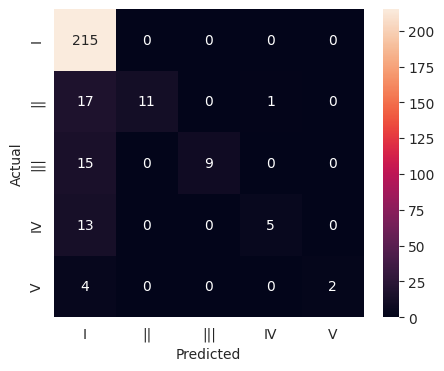

For Test Data


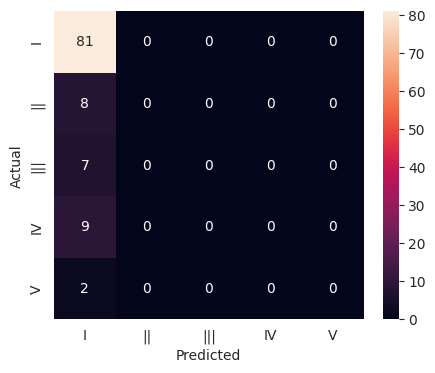

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.81      1.00      0.90       215
           2       1.00      0.38      0.55        29
           3       1.00      0.38      0.55        24
           4       0.83      0.28      0.42        18
           5       1.00      0.33      0.50         6

    accuracy                           0.83       292
   macro avg       0.93      0.47      0.58       292
weighted avg       0.85      0.83      0.80       292

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.76      1.00      0.86        81
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2

    accura

In [ ]:
pred_plot_confusion_matrix ("Base Word2Vec",rf_word2vec, X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec)

In [ ]:
print(ListMetrics)

[['Base Word2Vec', 0.8287671232876712, 0.7570093457943925]]


**Observations**

### WIth Word2Vec( with Class balancing)

In [ ]:
rf_word2vec_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_word2vec_balanced.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', random_state=42)

For Train Data


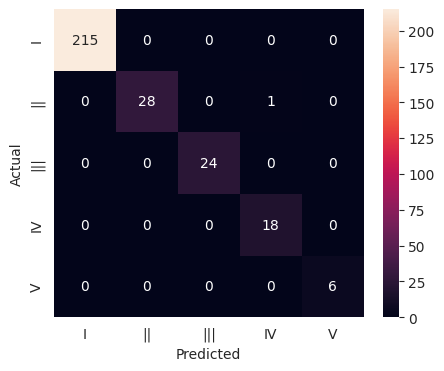

For Test Data


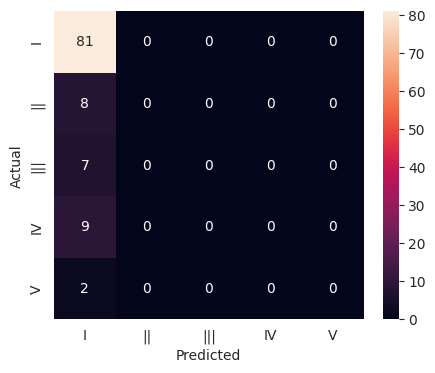

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       215
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00        24
           4       0.95      1.00      0.97        18
           5       1.00      1.00      1.00         6

    accuracy                           1.00       292
   macro avg       0.99      0.99      0.99       292
weighted avg       1.00      1.00      1.00       292

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.76      1.00      0.86        81
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2

    accura

In [ ]:
pred_plot_confusion_matrix ("Balanced Word2Vec",rf_word2vec_balanced, X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec)

**Observations**

### **Random Forest with Glove**

In [ ]:
# Concatenating the features from transformer vectorization with the other columns from the dataset

df_Glove= pd.concat([data.iloc[:, :-1],df_Glove_vec], axis=1)

In [ ]:
X_glove = df_Glove.drop(targetColumn, axis=1)

# Storing target variable
y_glove= df_Glove[targetColumn]

In [ ]:
# Split data into training and testing set.
X_train_glove, X_temp_glove, y_train_glove, y_temp_glove = train_test_split(X_glove ,y_glove, test_size = 0.3, random_state = 42)
# Split temp dataset into test and valdiation set
X_test_glove, X_val_glove, y_test_glove, y_val_glove = train_test_split(X_temp_glove ,y_temp_glove, test_size = 0.15, random_state = 42)

In [ ]:
# Building the model
rf_glove = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_glove.fit(X_train_glove, y_train_glove)

RandomForestClassifier(max_depth=7, random_state=42)

For Train Data


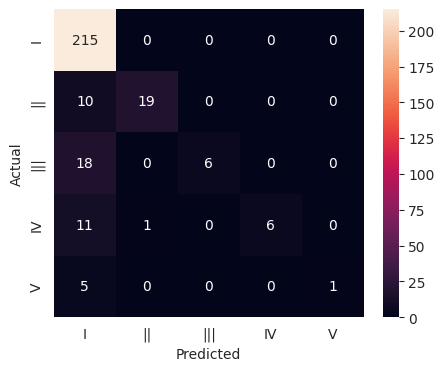

For Test Data


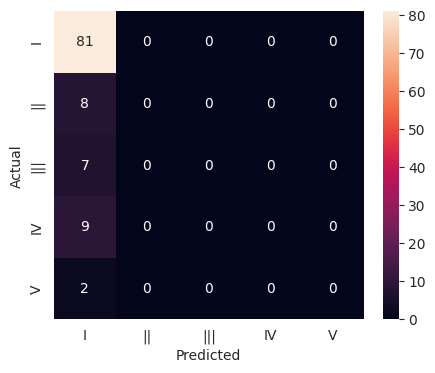

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.83      1.00      0.91       215
           2       0.95      0.66      0.78        29
           3       1.00      0.25      0.40        24
           4       1.00      0.33      0.50        18
           5       1.00      0.17      0.29         6

    accuracy                           0.85       292
   macro avg       0.96      0.48      0.57       292
weighted avg       0.87      0.85      0.81       292

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.76      1.00      0.86        81
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2

    accura

In [ ]:
pred_plot_confusion_matrix ("Base Glove",rf_glove, X_train_glove, X_test_glove, y_train_glove, y_test_glove)

### With Glove( with Class balancing)

In [ ]:
rf_glove_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_glove_balanced.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', random_state=42)

For Train Data


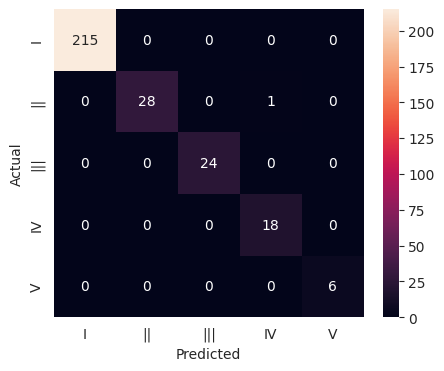

For Test Data


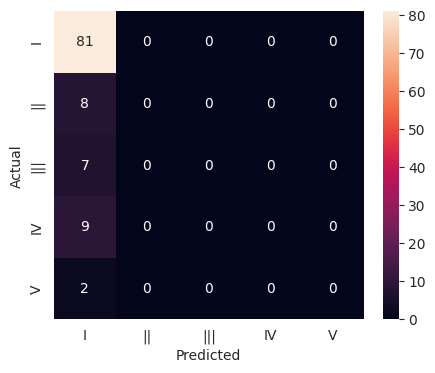

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       215
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00        24
           4       0.95      1.00      0.97        18
           5       1.00      1.00      1.00         6

    accuracy                           1.00       292
   macro avg       0.99      0.99      0.99       292
weighted avg       1.00      1.00      1.00       292

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.76      1.00      0.86        81
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2

    accura

In [ ]:
pred_plot_confusion_matrix ("Balanced Glove",rf_glove_balanced, X_train_glove, X_test_glove, y_train_glove, y_test_glove)

### **Random Forest with Transformers**

In [ ]:
# Concatenating the features from transformer vectorization with the other columns from the dataset

df_transformer =pd.concat([data.iloc[:, :-1],df_transformers_vec], axis=1)

In [ ]:
# Process the data

X_transformer = df_transformer.drop(targetColumn, axis=1)
y_transformer = df_transformer[targetColumn]

In [ ]:
X_train_transformer, X_temp_transformer, y_train_transformer, y_temp_transformer = train_test_split(X_transformer, y_transformer, test_size=0.25, random_state=42)

X_test_transformer, X_val_transformer, y_test_transformer, y_val_transformer = train_test_split(X_temp_transformer ,y_temp_transformer, test_size = 0.15, random_state = 42)

In [ ]:
# build a RF model

# Building the model
rf_transformer = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train_transformer, y_train_transformer)

RandomForestClassifier(max_depth=7, random_state=42)

For Train Data


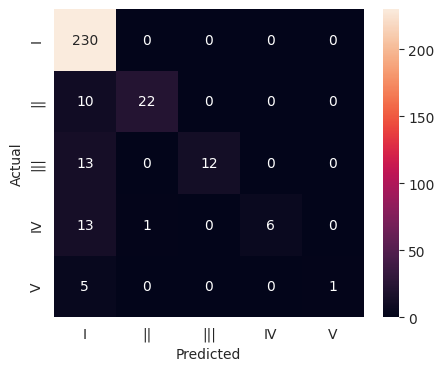

For Test Data


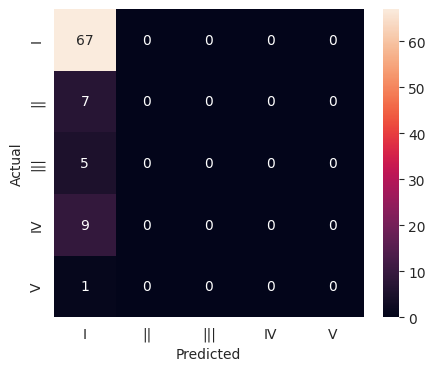

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.85      1.00      0.92       230
           2       0.96      0.69      0.80        32
           3       1.00      0.48      0.65        25
           4       1.00      0.30      0.46        20
           5       1.00      0.17      0.29         6

    accuracy                           0.87       313
   macro avg       0.96      0.53      0.62       313
weighted avg       0.88      0.87      0.84       313

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        67
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         1

    accura

In [ ]:
pred_plot_confusion_matrix ("Base Transformer",rf_transformer, X_train_transformer, X_test_transformer, y_train_transformer, y_test_transformer )

### With Transformer( with Class balancing)

In [ ]:
# build a RF model

# Building the model
rf_transformer_balanced = RandomForestClassifier(class_weight="balanced",random_state = 42)

# Fitting on train data
rf_transformer_balanced.fit(X_train_transformer, y_train_transformer)

RandomForestClassifier(class_weight='balanced', random_state=42)

For Train Data


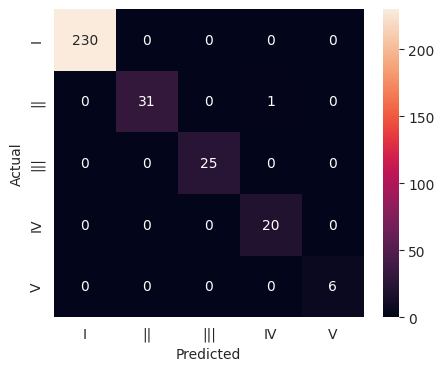

For Test Data


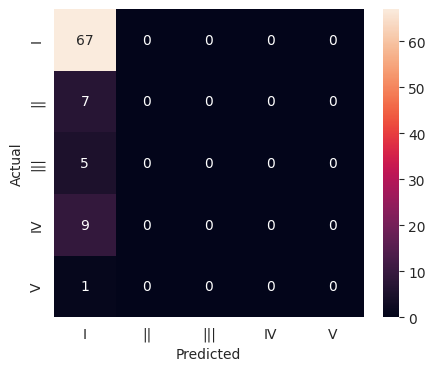

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       230
           2       1.00      0.97      0.98        32
           3       1.00      1.00      1.00        25
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00         6

    accuracy                           1.00       313
   macro avg       0.99      0.99      0.99       313
weighted avg       1.00      1.00      1.00       313

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        67
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         1

    accura

In [ ]:
pred_plot_confusion_matrix ("Balanced Transformer",rf_transformer_balanced, X_train_transformer, X_test_transformer, y_train_transformer, y_test_transformer )

In [ ]:
dfMetrics = pd.DataFrame(ListMetrics, columns=["Model", "Train Accuracy", "Test Accuracy"])
print(dfMetrics)

                  Model  Train Accuracy  Test Accuracy
0         Base Word2Vec        0.828767       0.757009
1     Balanced Word2Vec        0.996575       0.757009
2            Base Glove        0.845890       0.757009
3        Balanced Glove        0.996575       0.757009
4      Base Transformer        0.865815       0.752809
5  Balanced Transformer        0.996805       0.752809


### Retrying with HyperParameter tuning

In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
def TunedModel(X_train, y_train):
    # Choose the type of classifier
    rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

    # defining the hyperparameter grid for tuning
    parameters = {
        "max_depth": list(np.arange(4, 15, 20)),
        "max_features": ["sqrt", 0.5, 0.7],
        "min_samples_split": [5, 6, 7],
        "n_estimators": np.arange(30, 110, 10),
    }

    # defining the type of scoring used to compare parameter combinations
    # we need to specify the mechanism of averaging as we have more than 2 target classes
    scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

    # running the grid search
    grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)
    return grid_obj

### Word2Vec With TUning

In [ ]:
rf_word2Vec_balanced_tuned = TunedModel(X_train_word2vec,y_train_word2vec )

For Train Data


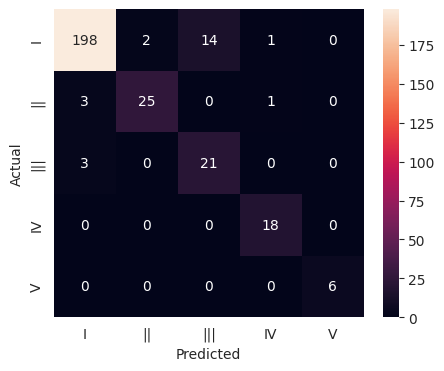

For Test Data


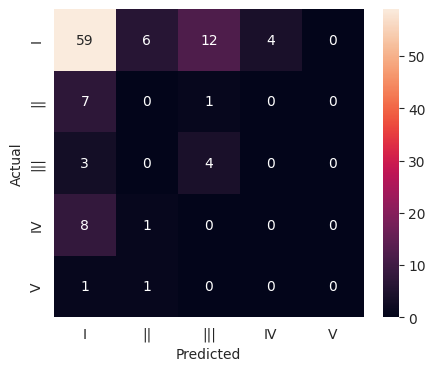

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.97      0.92      0.95       215
           2       0.93      0.86      0.89        29
           3       0.60      0.88      0.71        24
           4       0.90      1.00      0.95        18
           5       1.00      1.00      1.00         6

    accuracy                           0.92       292
   macro avg       0.88      0.93      0.90       292
weighted avg       0.93      0.92      0.92       292

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.76      0.73      0.74        81
           2       0.00      0.00      0.00         8
           3       0.24      0.57      0.33         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2

    accura

In [ ]:
pred_plot_confusion_matrix ("Tuned Word2Vec",rf_word2Vec_balanced_tuned, X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec)

### Glove(with tuning)

In [ ]:
rf_glove_balanced_tuned = TunedModel(X_train_glove,y_train_glove )

For Train Data


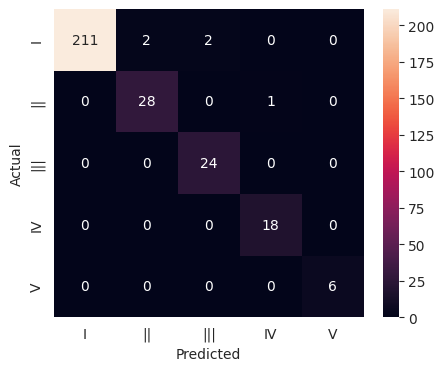

For Test Data


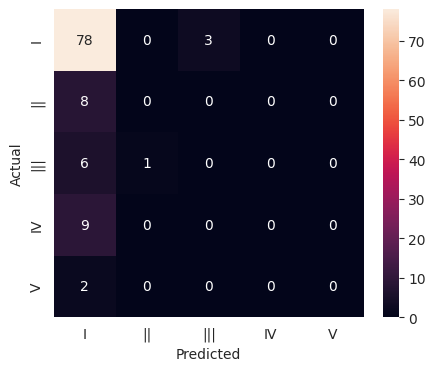

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       215
           2       0.93      0.97      0.95        29
           3       0.92      1.00      0.96        24
           4       0.95      1.00      0.97        18
           5       1.00      1.00      1.00         6

    accuracy                           0.98       292
   macro avg       0.96      0.99      0.97       292
weighted avg       0.98      0.98      0.98       292

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.76      0.96      0.85        81
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2

    accura

In [ ]:
pred_plot_confusion_matrix ("Tuned Glove",rf_glove_balanced_tuned, X_train_glove, X_test_glove, y_train_glove, y_test_glove)

### With Transformers( Tuned)

In [ ]:
rf_transformer_balanced_tuned= TunedModel(X_train_transformer,y_train_transformer )

For Train Data


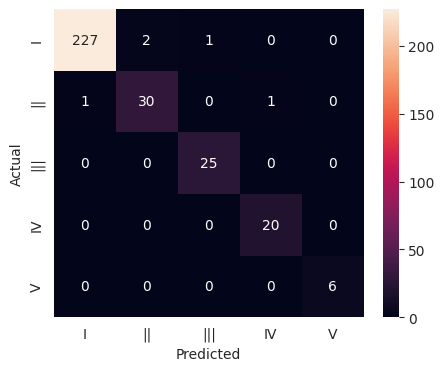

For Test Data


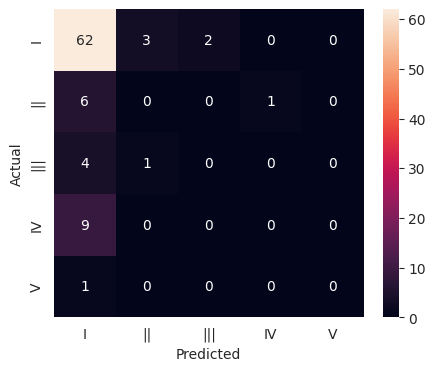

--------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       230
           2       0.94      0.94      0.94        32
           3       0.96      1.00      0.98        25
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00         6

    accuracy                           0.98       313
   macro avg       0.97      0.98      0.98       313
weighted avg       0.98      0.98      0.98       313

--------------------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.76      0.93      0.83        67
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         1

    accura

In [ ]:
pred_plot_confusion_matrix ("Tuned Transformer",rf_transformer_balanced_tuned, X_train_transformer, X_test_transformer, y_train_transformer, y_test_transformer)

In [ ]:
dfMetrics = pd.DataFrame(ListMetrics, columns=["Model", "Train Accuracy", "Test Accuracy"])
print(dfMetrics)

                   Model  Train Accuracy  Test Accuracy
0          Base Word2Vec        0.828767       0.757009
1      Balanced Word2Vec        0.996575       0.757009
2             Base Glove        0.845890       0.757009
3         Balanced Glove        0.996575       0.757009
4       Base Transformer        0.865815       0.752809
5   Balanced Transformer        0.996805       0.752809
6         Tuned Word2Vec        0.996575       0.757009
7            Tuned Glove        0.996575       0.757009
8      Tuned Transformer        0.984026       0.696629
9         Tuned Word2Vec        0.917808       0.588785
10           Tuned Glove        0.982877       0.728972
